In [1]:
import wandb
import pandas as pd

wandb.login()

wandb: Currently logged in as: jack-j-desmarais (jjd_academic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v11_adaptive_chunk_size_dataset'})
dfs = {}
for run in runs:
    # print(run.config)
    val_class_metrics = run.history(samples=1000, keys=['epoch', '_runtime','val_num_dead_features','val_loss','val_l1_loss','val_l2_loss','val_l0_norm','val_l1_norm','val_aux_loss'])
    train_metrics = run.history(samples=1000, keys=['epoch','train_num_dead_features','train_loss','train_l1_loss','train_l2_loss','train_l0_norm','train_l1_norm','train_aux_loss'])
    # print(f'{val_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not val_class_metrics.empty) and (not train_metrics.empty):
        val_class_metrics.loc[0,'epoch'] = -1
        metrics = pd.merge(left=val_class_metrics.drop(columns='_step'), right=train_metrics.drop(columns='_step'), on='epoch', how='outer')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'],run.config['cfg']['num_workers'])] = metrics
metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','num_workers','epoch']

metrics

Metrics                                                epoch      _runtime  \
dict_size topk topk_aux aux_penalty num_workers epoch                        
256       16   16       1.00        64          0         -1     74.734658   
                                                1          0    399.026497   
                                                2          1    687.374385   
                                                3          2    973.410846   
                                                4          3   1265.471385   
...                                                      ...           ...   
512       24   128      0.01        64          67        66  32684.587771   
                                                68        67  33174.524354   
                                                69        68  33670.168133   
                                                70        69  34902.994686   
                                                71        70  34903.074684   

Metrics                                                val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch                          
256       16   16       1.00        64          0                  10.874705   
                                                1                   0.210732   
                                                2                   0.578807   
                                                3                   1.889879   
                                                4                   1.858844   
...                                                                      ...   
512       24   128      0.01        64          67                446.643005   
                                                68                446.327820   
                                                69                446.450195   
                                                70                447.863617   
                                                71                447.863617   

Metrics                                                  val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch               
256       16   16       1.00        64          0      374.020721   
                                                1       22.752153   
                                                2       12.731694   
                                                3       10.826054   
                                                4        9.348509   
...                                                           ...   
512       24   128      0.01        64          67       0.430816   
                                                68       0.430830   
                                                69       0.430793   
                                                70       0.430648   
                                                71       0.430648   

Metrics                                                val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
256       16   16       1.00        64          0                0   
                                                1                0   
                                                2                0   
                                                3                0   
                                                4                0   
...                                                            ...   
512       24   128      0.01        64          67               0   
                                                68               0   
                                                69               0   
                                                70               0   
                                                71               0   

Metrics                                                val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch            

In [3]:
metrics.to_csv('./v11_adaptive_chunk_size_dataset-Training_traces.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v11_adaptive_chunk_size_dataset-Training_traces.csv',index_col=[0,1,2,3,4,5,6,7], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                                                     val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                              
256       16   16       1.00        64          0     -1      74.734658                 10.874705   
                                                1      0      399.026497                 0.210732   
                                                2      1      687.374385                 0.578807   
                                                3      2      973.410846                 1.889879   
                                                4      3      1265.471385                1.858844   
...                                                                                           ...   
512       24   128      0.01        64          67     66     32684.587771             446.643005   
                                                68     67     33174.524354             446.327820   
                                                69     68     33670.168133             446.450195   
                                                70     69     34902.994686             447.863617   
                                                71     70     34903.074684             447.863617   

Metrics                                                                       val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                   
256       16   16       1.00        64          0     -1      74.734658     374.020721   
                                                1      0      399.026497     22.752153   
                                                2      1      687.374385     12.731694   
                                                3      2      973.410846     10.826054   
                                                4      3      1265.471385     9.348509   
...                                                                                ...   
512       24   128      0.01        64          67     66     32684.587771    0.430816   
                                                68     67     33174.524354    0.430830   
                                                69     68     33670.168133    0.430793   
                                                70     69     34902.994686    0.430648   
                                                71     70     34903.074684    0.430648   

Metrics                                                                     val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       16   16       1.00        64          0     -1      74.734658               0   
                                                1      0      399.026497              0   
                                                2      1      687.374385              0   
                                                3      2      973.410846              0   
                                                4      3      1265.471385             0   
...                                                                                 ...   
512       24   128      0.01        64          67     66     32684.587771            0   
                                                68     67     33174.524354            0   
                                                69     68     33670.168133            0   
                                                70     69     34902.994686            0   
                                                71     70     34903.074684            0   

Metrics                                                                     val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       16   16       1.00        64          0     -1      74.734658      189.853455   
                                                1      0  

In [5]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ').strip() for col in to_plot.columns]
to_plot['val live features'] = to_plot['dict size'] - to_plot['val num dead features']
to_plot['train live features'] = to_plot['dict size'] - to_plot['train num dead features']
to_plot['running epoch time (sec)'] = to_plot['runtime']/to_plot['epoch']
to_plot['running epoch time (min)'] = to_plot['running epoch time (sec)']/60
display(to_plot)

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
0,256,16,16,1.00,64,0,-1,74.734658,10.874705,374.020721,...,NaN,NaN,NaN,NaN,NaN,NaN,245.125295,NaN,inf,inf
1,256,16,16,1.00,64,1,0,399.026497,0.210732,22.752153,...,59.173969,0.0,37.110226,15.999944,283.716461,22.063787,255.789268,254.908710,399.026497,6.650442
2,256,16,16,1.00,64,2,1,687.374385,0.578807,12.731694,...,15.933737,0.0,12.022991,15.999944,295.743561,3.910754,255.421193,255.736385,343.687192,5.728120
3,256,16,16,1.00,64,3,2,973.410846,1.889879,10.826054,...,10.104864,0.0,6.624357,15.999944,296.739655,3.480505,254.110121,255.449773,324.470282,5.407838
4,256,16,16,1.00,64,4,3,1265.471385,1.858844,9.348509,...,9.025315,0.0,5.033653,15.999944,290.778656,3.991657,254.141156,255.013484,316.367846,5.272797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,512,24,128,0.01,64,67,66,32684.587771,446.643005,0.430816,...,0.429292,0.0,0.425053,24.000107,278.971497,0.004240,65.356995,65.856323,487.829668,8.130494
3451,512,24,128,0.01,64,68,67,33174.524354,446.327820,0.430830,...,0.429226,0.0,0.424978,24.000107,278.964996,0.004248,65.672180,65.382568,487.860652,8.131011
3452,512,24,128,0.01,64,69,68,33670.168133,446.450195,0.430793,...,0.429154,0.0,0.424909,24.000107,278.964844,0.004245,65.549805,65.105286,487.973451,8.132891
3453,512,24,128,0.01,64,70,69,34902.994686,447.863617,0.430648,...,0.429089,0.0,0.424844,24.000107,278.957977,0.004246,64.136383,65.408600,498.614210,8.310237


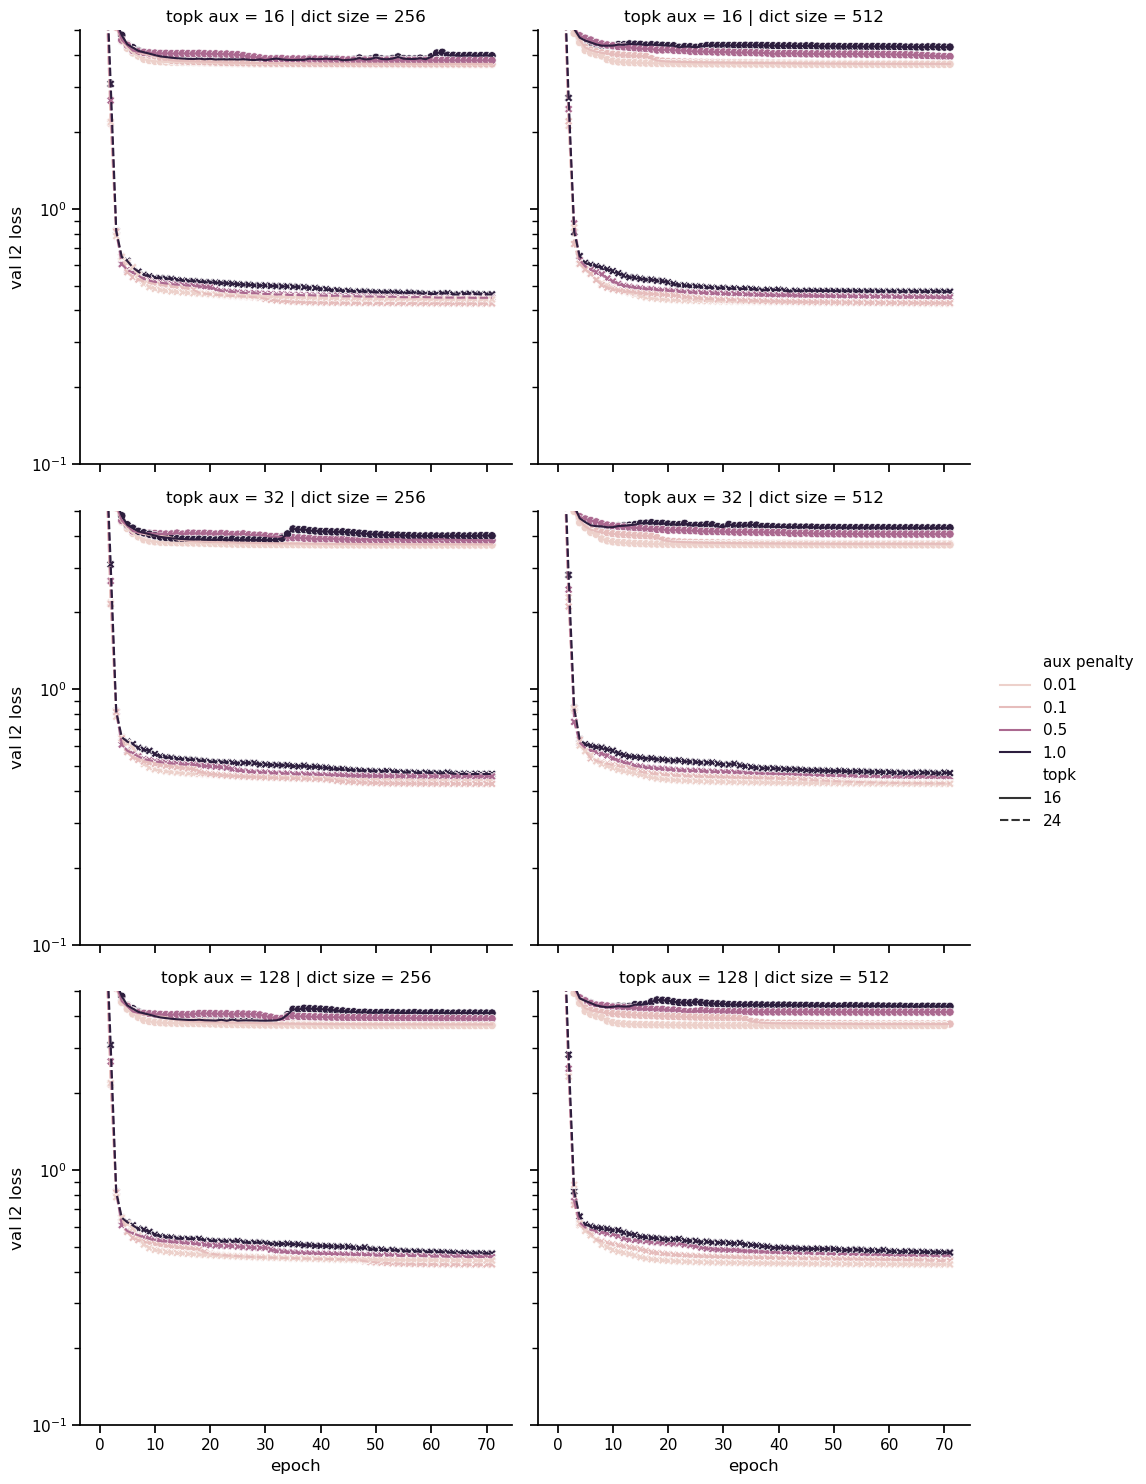

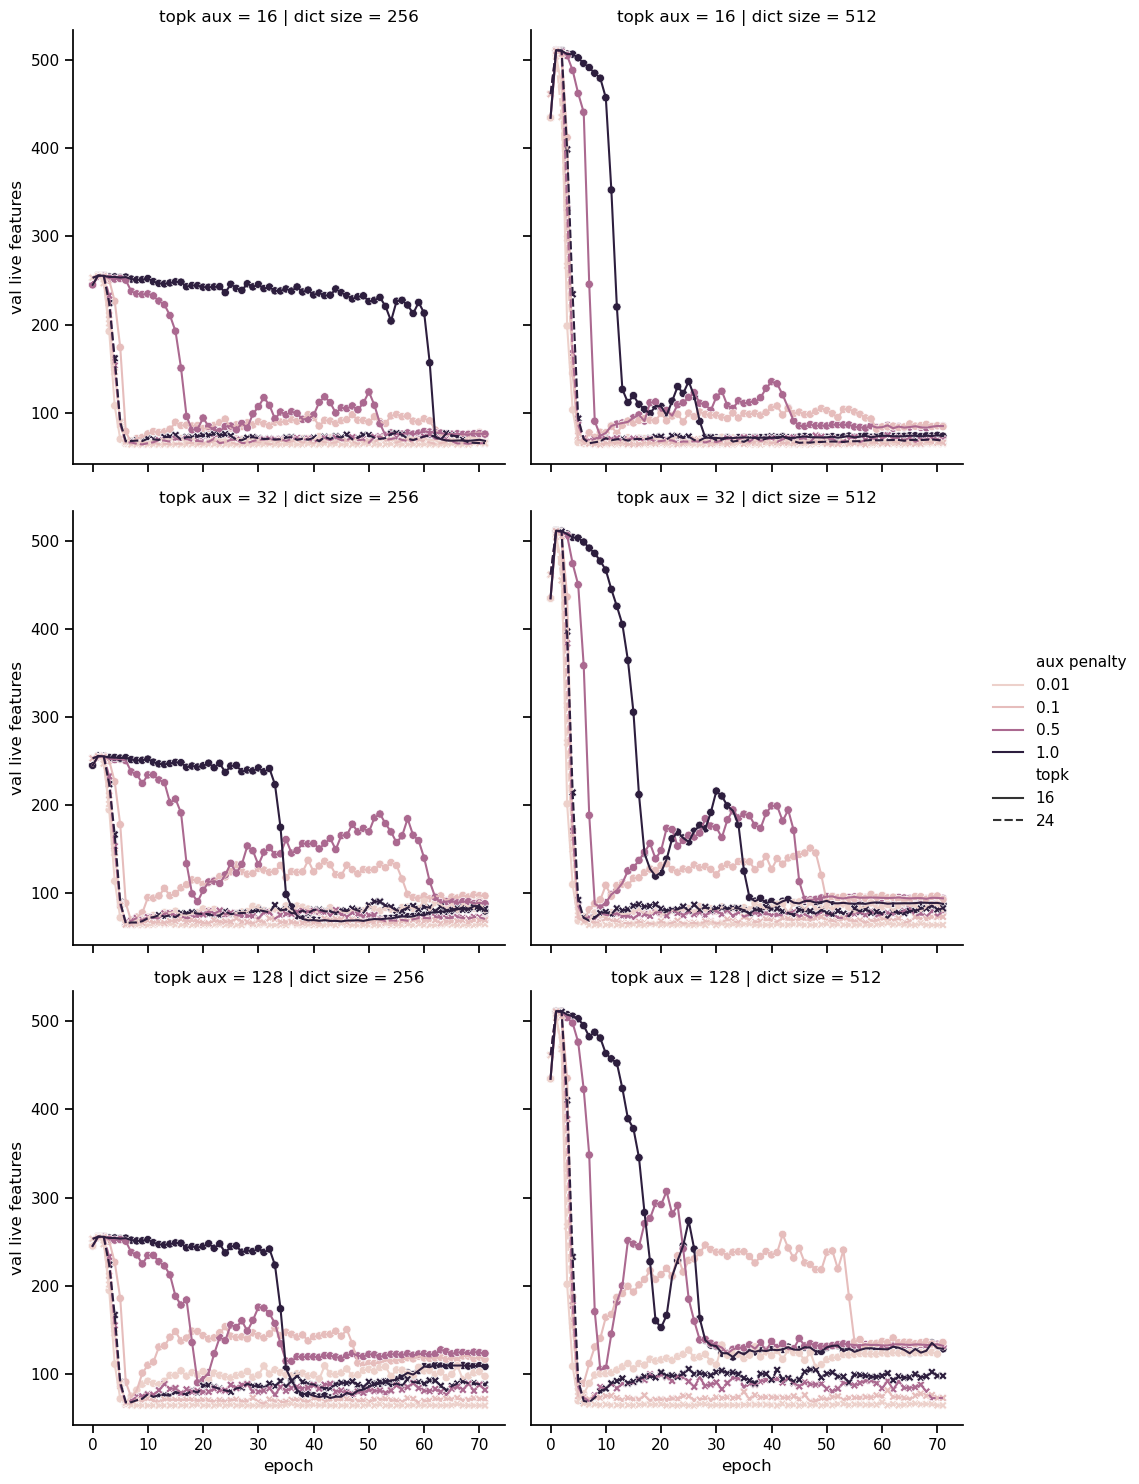

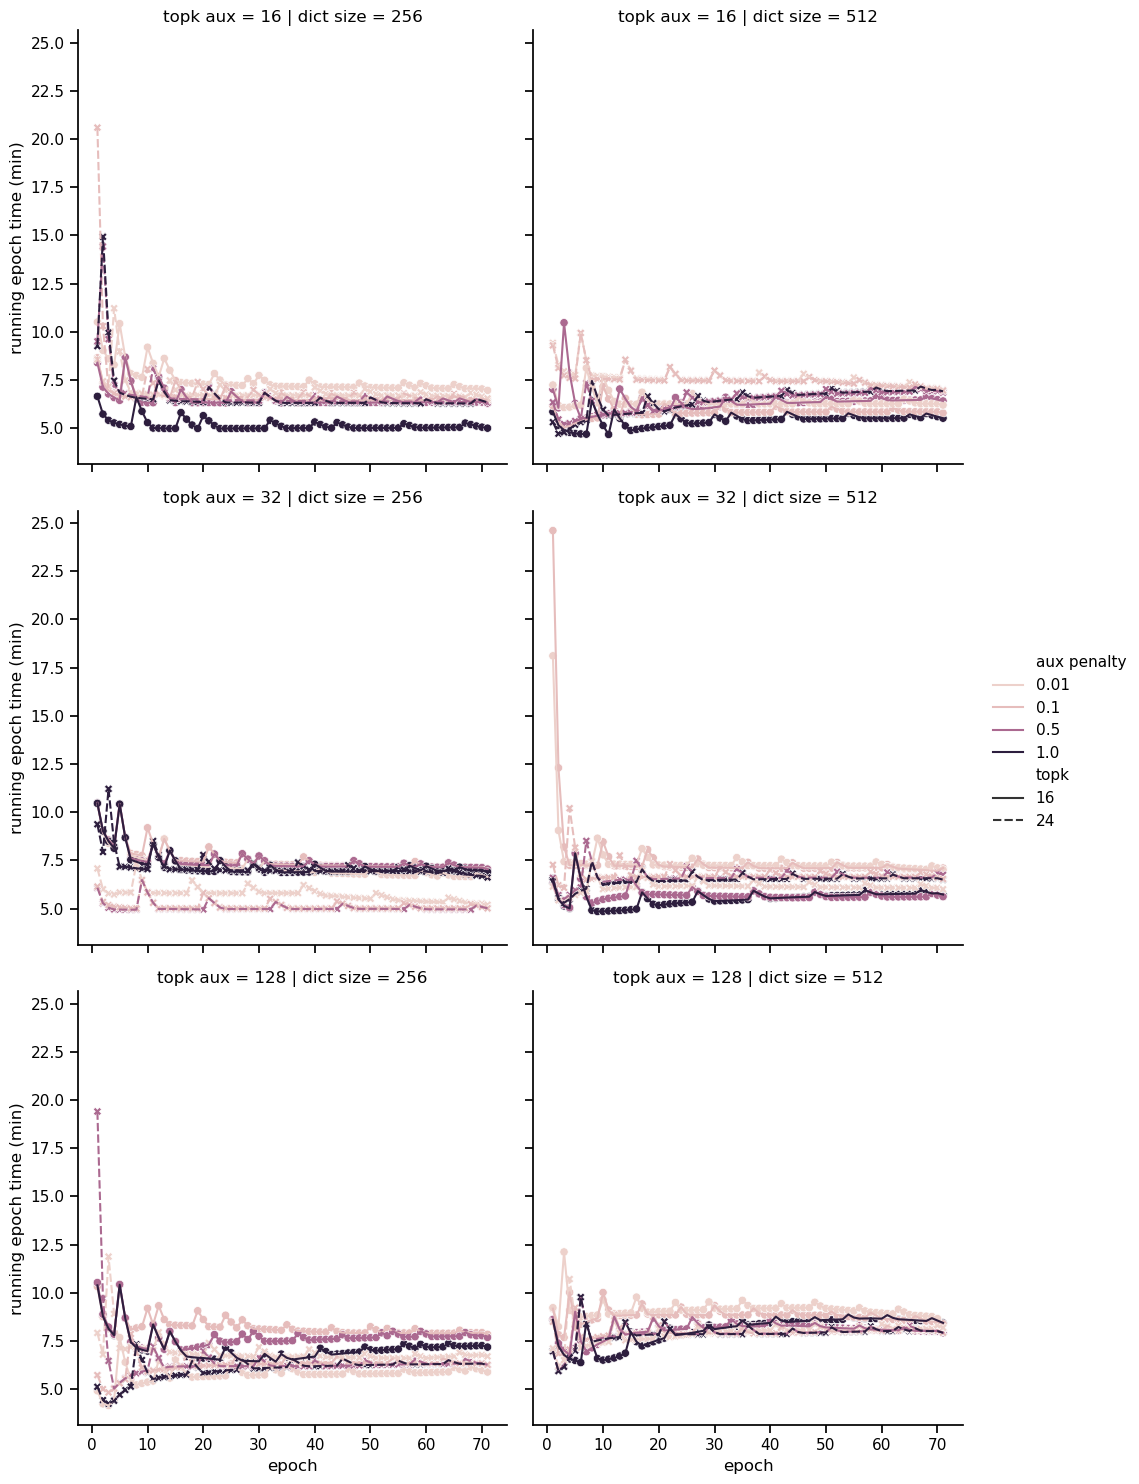

In [6]:
test_cols = ['val l2 loss','val live features', 'running epoch time (min)']
to_plot['num workers'] = pd.Categorical(to_plot['num workers'])


for col in test_cols:
    g= sns.relplot(data=to_plot, kind='line',
                x= 'epoch', y=col, 
                hue='aux penalty',
                style='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                style='topk', hue='aux penalty')
    # g.refline(x=20, color='k', linestyle='--', alpha=0.5)
    # g.refline(x=39, color='k', linestyle='--', alpha=0.5)
    if col == 'val l2 loss':
        plt.ylim(0.1,5)
        plt.yscale('log')
        
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

In [7]:
bar = to_plot.loc[to_plot.groupby(['topk aux','topk','dict size', 'aux penalty'], observed=True)['val loss'].idxmin()]
bar

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
143,256,16,16,0.01,64,71,70,29644.770829,188.173569,3.708519,...,NaN,NaN,NaN,NaN,NaN,NaN,67.826431,NaN,417.531984,6.958866
359,256,16,16,0.10,64,71,70,27160.000511,181.222092,4.013791,...,NaN,NaN,NaN,NaN,NaN,NaN,74.777908,NaN,382.535218,6.375587
503,256,16,16,0.50,64,71,70,26774.644213,180.221863,5.344370,...,NaN,NaN,NaN,NaN,NaN,NaN,75.778137,NaN,377.107665,6.285128
71,256,16,16,1.00,64,71,70,21302.546513,187.915298,6.891747,...,NaN,NaN,NaN,NaN,NaN,NaN,68.084702,NaN,300.035866,5.000598
1151,512,16,16,0.01,64,71,70,26408.582873,444.345734,3.715291,...,NaN,NaN,NaN,NaN,NaN,NaN,67.654266,NaN,371.951871,6.199198
1079,512,16,16,0.10,64,71,70,24647.443243,427.758728,4.016158,...,NaN,NaN,NaN,NaN,NaN,NaN,84.241272,NaN,347.147088,5.785785
1007,512,16,16,0.50,64,71,70,27308.729964,427.118561,5.501648,...,NaN,NaN,NaN,NaN,NaN,NaN,84.881439,NaN,384.629999,6.410500
935,512,16,16,1.00,64,71,70,23502.349336,438.526917,7.176313,...,NaN,NaN,NaN,NaN,NaN,NaN,73.473083,NaN,331.019005,5.516983
2013,256,24,16,0.01,64,70,69,27878.290448,190.770889,0.446292,...,0.444620,0.0,0.440224,24.000107,288.395966,0.004397,65.229111,64.270325,398.261292,6.637688
1941,256,24,16,0.10,64,70,69,27398.973871,189.606262,0.468068,...,0.467004,0.0,0.425043,24.000107,278.715759,0.041961,66.393738,66.658020,391.413912,6.523565


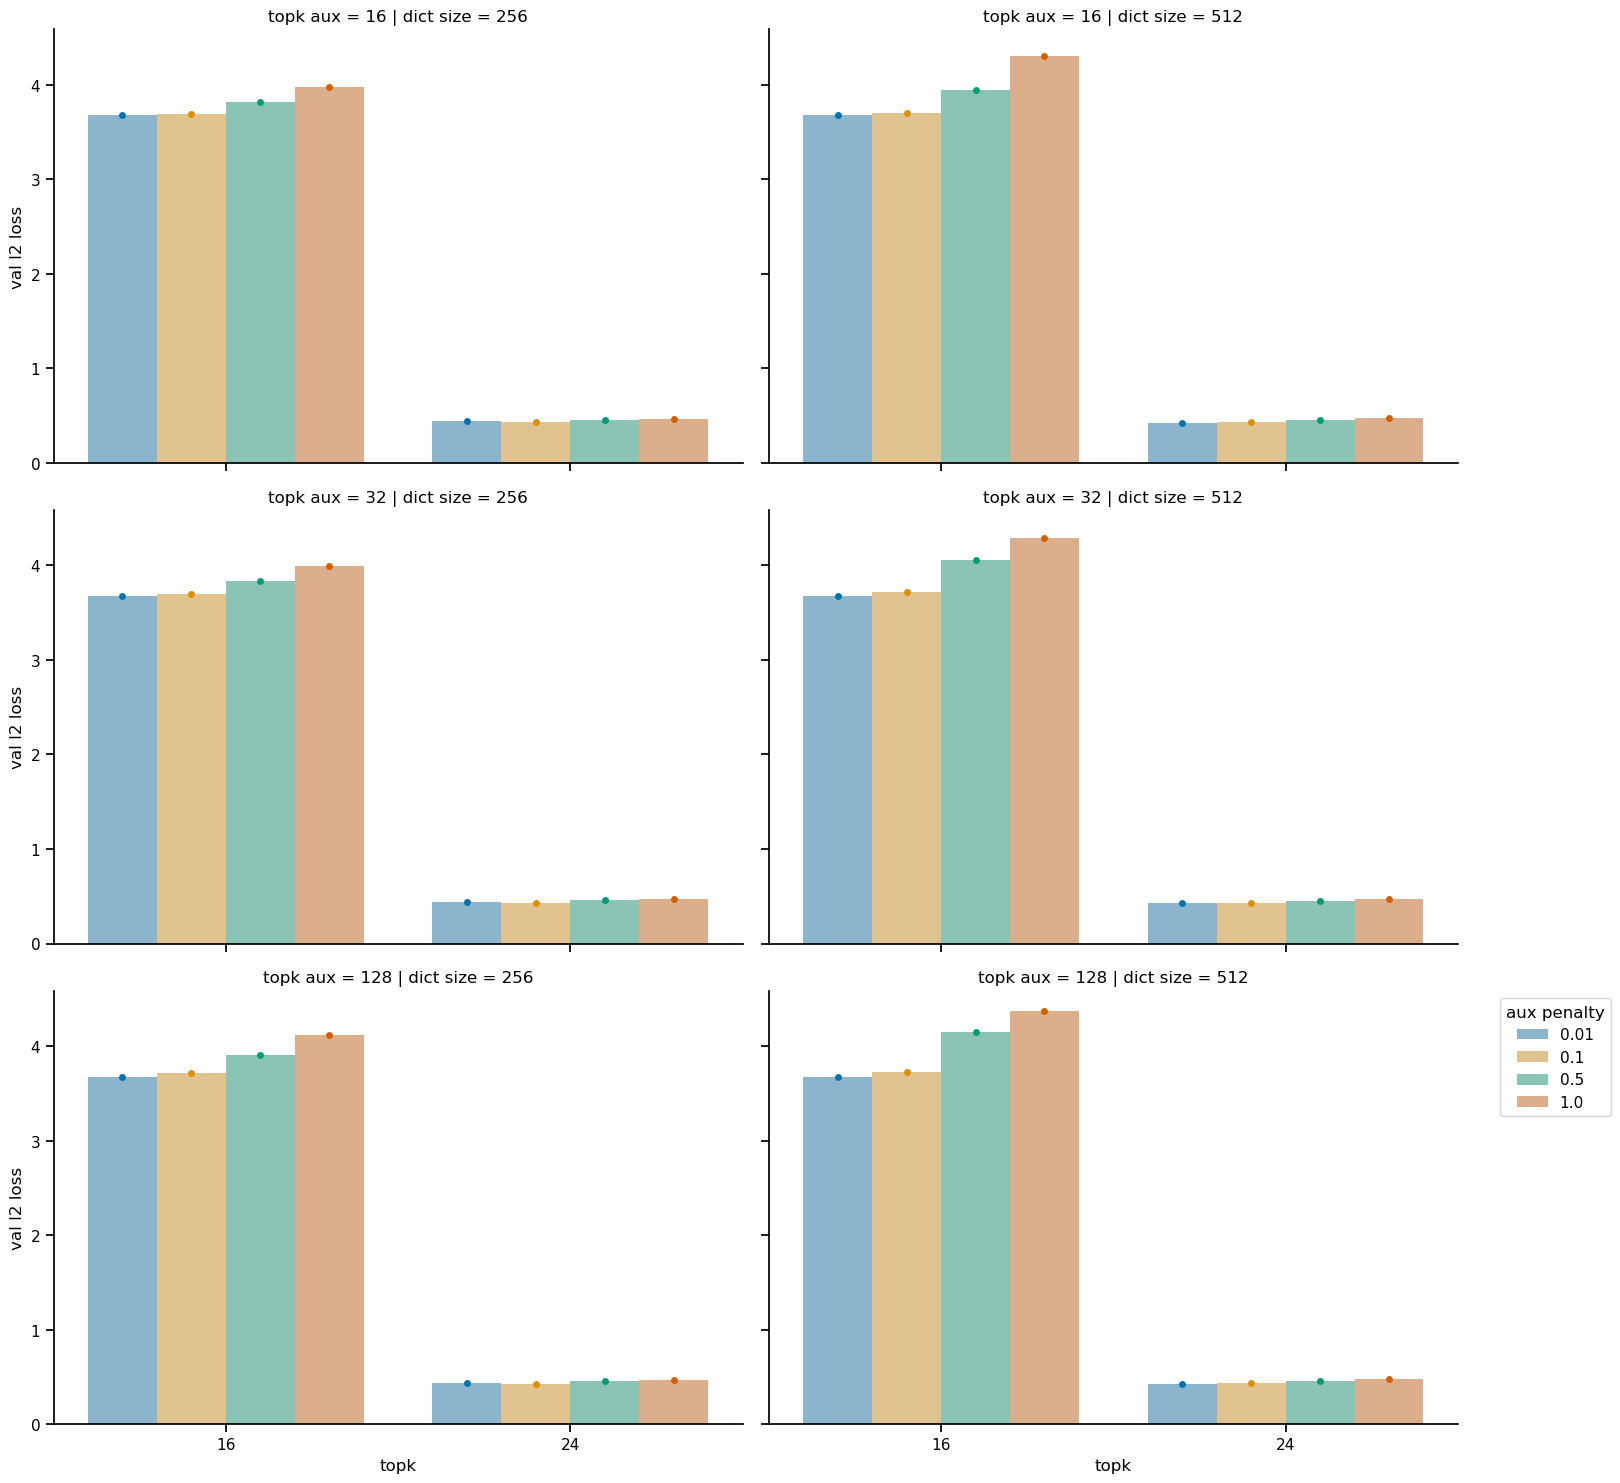

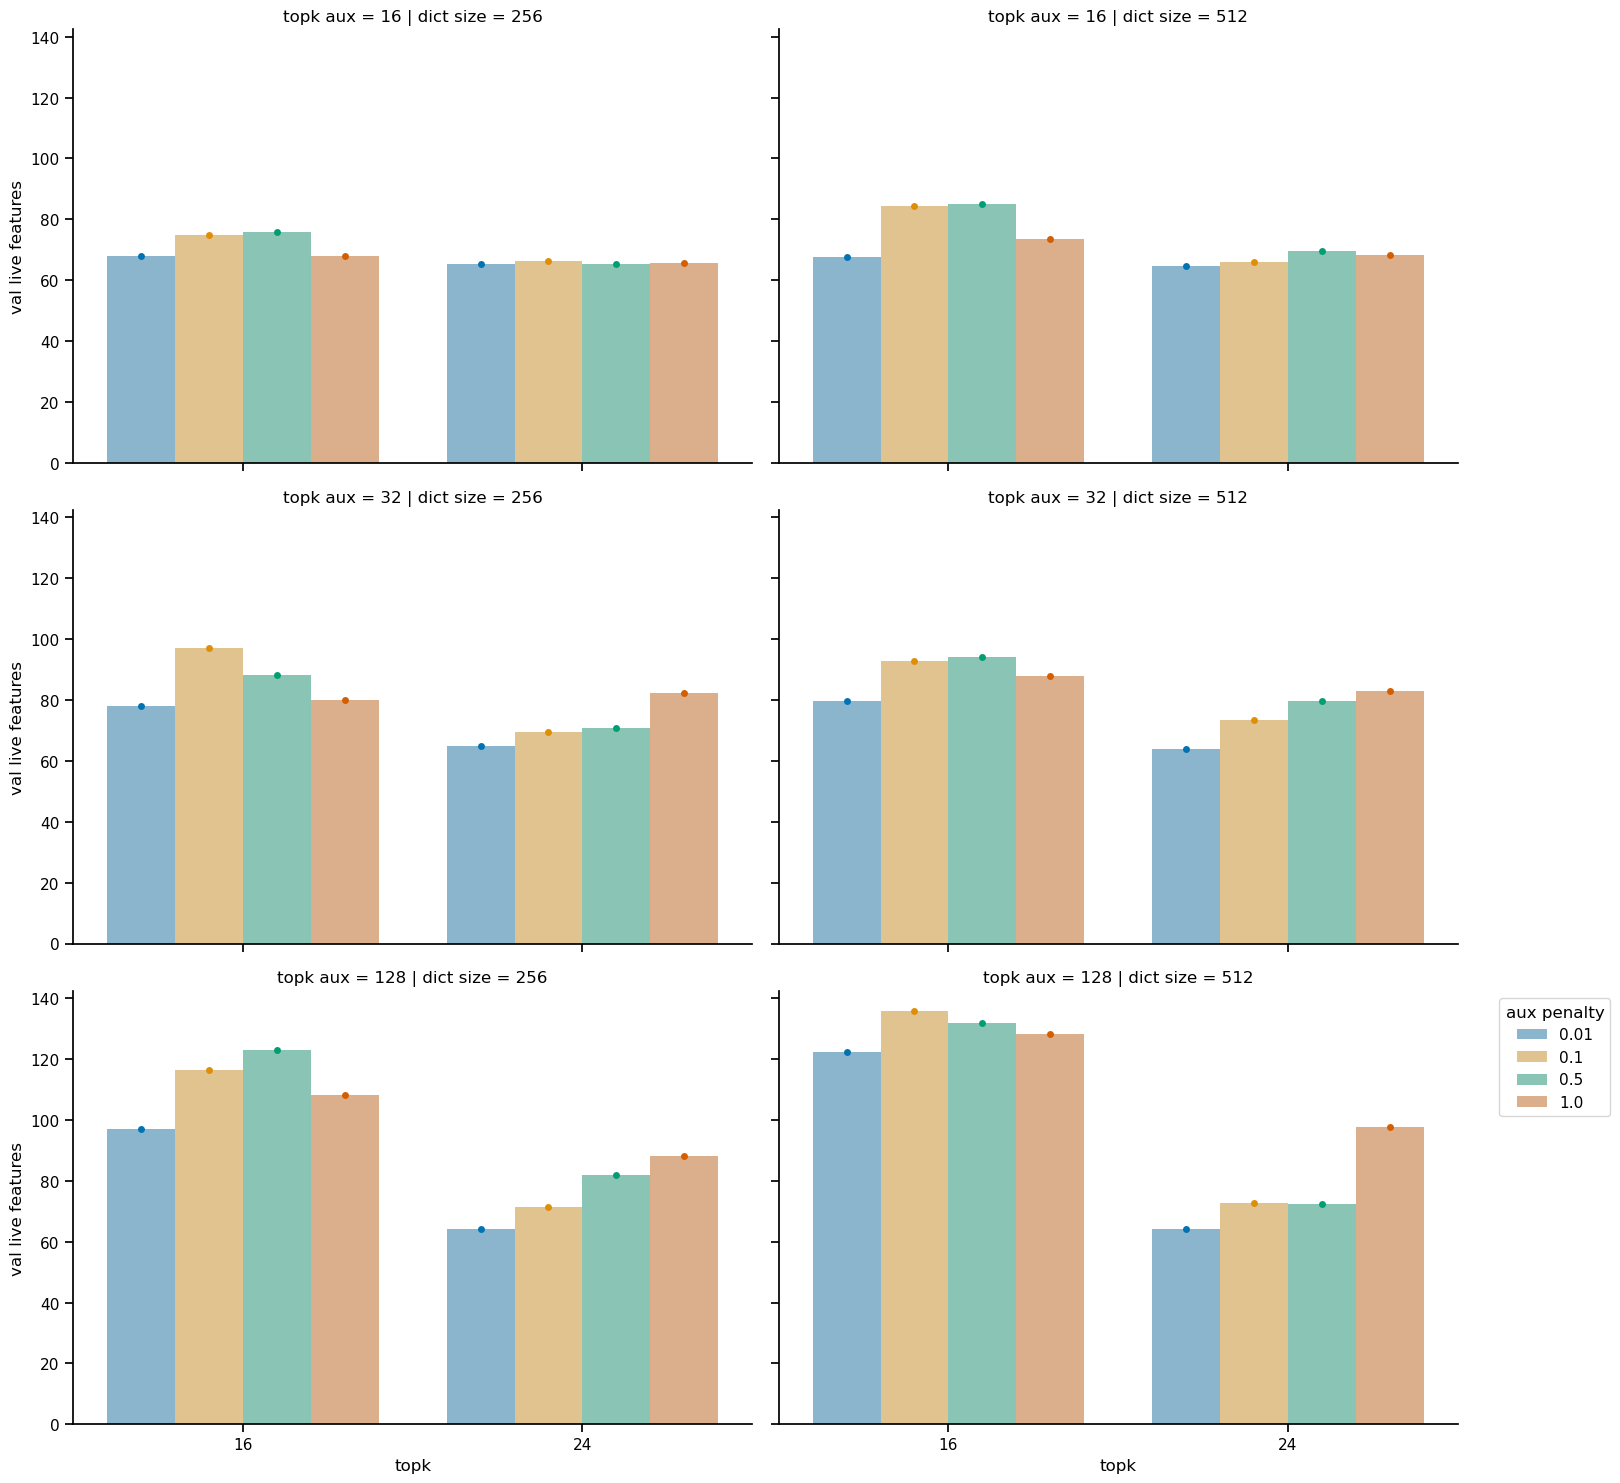

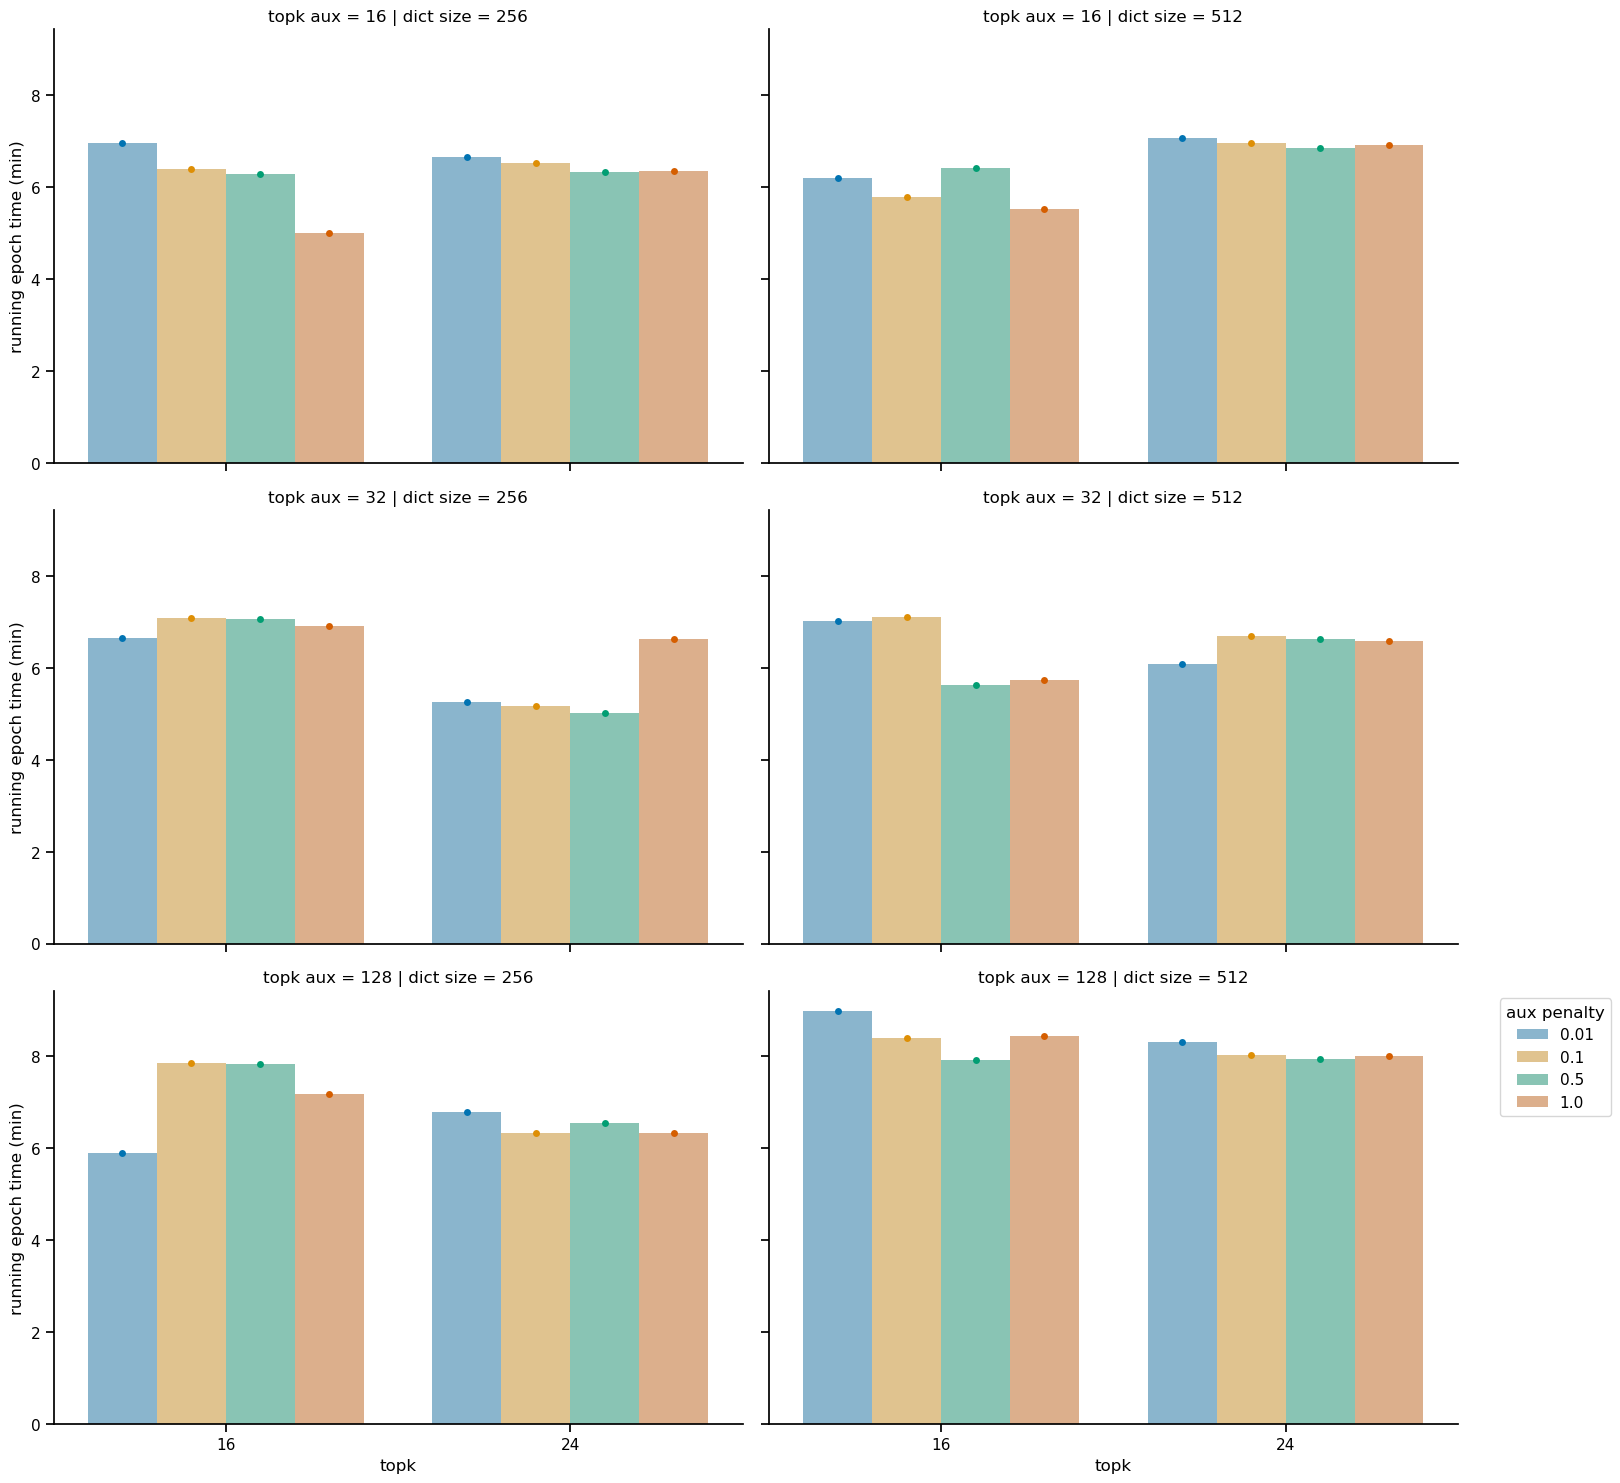

In [8]:
bar_plot = bar.copy()
# bar_plot['topk aux'] = 2 ** np.round(np.log2(bar_plot['topk aux']))

bar_plot['aux penalty'] = bar_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=bar_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [9]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v11_adaptive_chunk_size_dataset'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    test_class_metrics = run.history(samples=1000, keys=['test_num_dead_features','test_loss','test_l1_loss','test_l2_loss','test_l0_norm','test_l1_norm','test_aux_loss'])
    # print(f'{test_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not test_class_metrics.empty):
        metrics = test_class_metrics.drop(columns='_step')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','epoch']

metrics

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       16   16       1.00        0                  188.709686   6.885789   
                        0.01        0                  187.645157   3.718402   
               128      1.00        0                  148.806458   6.653996   
                        0.10        0                  143.645157   4.009285   
               16       0.10        0                  182.290298   4.024207   
               32       0.10        0                  162.000015   4.004097   
               16       0.50        0                  182.290314   5.350721   
               32       0.01        0                  179.806458   3.716761   
               128      0.50        0                  138.161285   5.316499   
               32       0.50        0                  173.580658   5.189340   
                        1.00        0                  179.645157   6.703944   
               128      0.01        0                  161.709686   3.715322   
512       16   16       1.00        0                  440.096741   7.181814   
                        0.50        0                  429.806427   5.517773   
                        0.10        0                  429.999969   4.025203   
                        0.01        0                  444.193542   3.725305   
               32       1.00        0                  428.064423   7.072677   
                        0.50        0                  424.290375   5.522179   
                        0.10        0                  424.806488   4.012682   
                        0.01        0                  434.483826   3.724393   
               128      1.00        0                  391.838715   6.659990   
                        0.50        0                  391.128998   5.368442   
                        0.10        0                  393.548370   3.985318   
                        0.01        0                  396.096771   3.714357   
256       24   16       1.00        0                  190.838730   0.898502   
                        0.50        0                  189.838699   0.664435   
                        0.10        0                  189.612900   0.469464   
                        0.01        0                  190.774139   0.447596   
               32       1.00        0                  174.580627   0.908127   
                        0.01        0                  190.999969   0.447168   
               128      1.00        0                  167.193558   0.918402   
               32       0.50        0                  184.612869   0.671678   
                        0.10        0                  186.483856   0.469986   
               128      0.50        0                  173.967758   0.677089   
                        0.10        0                  184.451599   0.469669   
                        0.01        0                  192.000000   0.447196   
512       24   16       1.00        0                  444.580627   0.912618   
                        0.50        0                  442.741882   0.668877   
               32       0.50        0                  431.483826   0.675926   
                        1.00        0                  430.645142   0.914973   
               16       0.01        0                  447.612976   0.431156   
                        0.10        0                  446.451569   0.470660   
               32       0.10        0                  439.161255   0.472052   
                        0.01        0                  448.000000   0.432195   
               128      0.50        0                  442.322601   0.679466   
                        1.00        0                  413.483917   0.930514   
                        0.10        0                  439.387146   0.484429   
                        0.01        0                  448.000000   0.431955   


In [10]:
metrics.to_csv('./v11_adaptive_chunk_size_dataset-test_results.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v11_adaptive_chunk_size_dataset-test_results.csv',index_col=[0,1,2,3,4], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       16   16       1.00        0                  188.709686   6.885789   
                        0.01        0                  187.645157   3.718402   
               128      1.00        0                  148.806458   6.653996   
                        0.10        0                  143.645157   4.009285   
               16       0.10        0                  182.290298   4.024207   
               32       0.10        0                  162.000015   4.004097   
               16       0.50        0                  182.290314   5.350721   
               32       0.01        0                  179.806458   3.716761   
               128      0.50        0                  138.161285   5.316499   
               32       0.50        0                  173.580658   5.189340   
                        1.00        0                  179.645157   6.703944   
               128      0.01        0                  161.709686   3.715322   
512       16   16       1.00        0                  440.096741   7.181814   
                        0.50        0                  429.806427   5.517773   
                        0.10        0                  429.999969   4.025203   
                        0.01        0                  444.193542   3.725305   
               32       1.00        0                  428.064423   7.072677   
                        0.50        0                  424.290375   5.522179   
                        0.10        0                  424.806488   4.012682   
                        0.01        0                  434.483826   3.724393   
               128      1.00        0                  391.838715   6.659990   
                        0.50        0                  391.128998   5.368442   
                        0.10        0                  393.548370   3.985318   
                        0.01        0                  396.096771   3.714357   
256       24   16       1.00        0                  190.838730   0.898502   
                        0.50        0                  189.838699   0.664435   
                        0.10        0                  189.612900   0.469464   
                        0.01        0                  190.774139   0.447596   
               32       1.00        0                  174.580627   0.908127   
                        0.01        0                  190.999969   0.447168   
               128      1.00        0                  167.193558   0.918402   
               32       0.50        0                  184.612869   0.671678   
                        0.10        0                  186.483856   0.469986   
               128      0.50        0                  173.967758   0.677089   
                        0.10        0                  184.451599   0.469669   
                        0.01        0                  192.000000   0.447196   
512       24   16       1.00        0                  444.580627   0.912618   
                        0.50        0                  442.741882   0.668877   
               32       0.50        0                  431.483826   0.675926   
                        1.00        0                  430.645142   0.914973   
               16       0.01        0                  447.612976   0.431156   
                        0.10        0                  446.451569   0.470660   
               32       0.10        0                  439.161255   0.472052   
                        0.01        0                  448.000000   0.432195   
               128      0.50        0                  442.322601   0.679466   
                        1.00        0                  413.483917   0.930514   
                        0.10        0                  439.387146   0.484429   
                        0.01        0                  448.000000   0.431955   


In [12]:
test_plot = metrics.reset_index()
test_plot.columns = [col.replace('_', ' ') for col in test_plot.columns]
test_plot['test live features'] = test_plot['dict size'] - test_plot['test num dead features']
display(test_plot)

,dict size,topk,topk aux,aux penalty,epoch,test num dead features,test loss,test l1 loss,test l2 loss,test l0 norm,test l1 norm,test aux loss,test live features
0,256,16,16,1.00,0,188.709686,6.885789,0,3.984905,16,245.468765,2.900885,67.290314
1,256,16,16,0.01,0,187.645157,3.718402,0,3.684978,16,250.200333,0.033424,68.354843
2,256,16,128,1.00,0,148.806458,6.653996,0,4.124478,16,242.535004,2.529518,107.193542
3,256,16,128,0.10,0,143.645157,4.009285,0,3.722795,16,248.818741,0.286490,112.354843
4,256,16,16,0.10,0,182.290298,4.024207,0,3.704068,16,248.849762,0.320139,73.709702
5,256,16,32,0.10,0,162.000015,4.004097,0,3.709240,16,248.789978,0.294856,93.999985
6,256,16,16,0.50,0,182.290314,5.350721,0,3.824362,16,246.760544,1.526359,73.709686
7,256,16,32,0.01,0,179.806458,3.716761,0,3.684342,16,250.113083,0.032420,76.193542
8,256,16,128,0.50,0,138.161285,5.316499,0,3.920173,16,246.980789,1.396327,117.838715
9,256,16,32,0.50,0,173.580658,5.189340,0,3.848749,16,246.032578,1.340590,82.419342


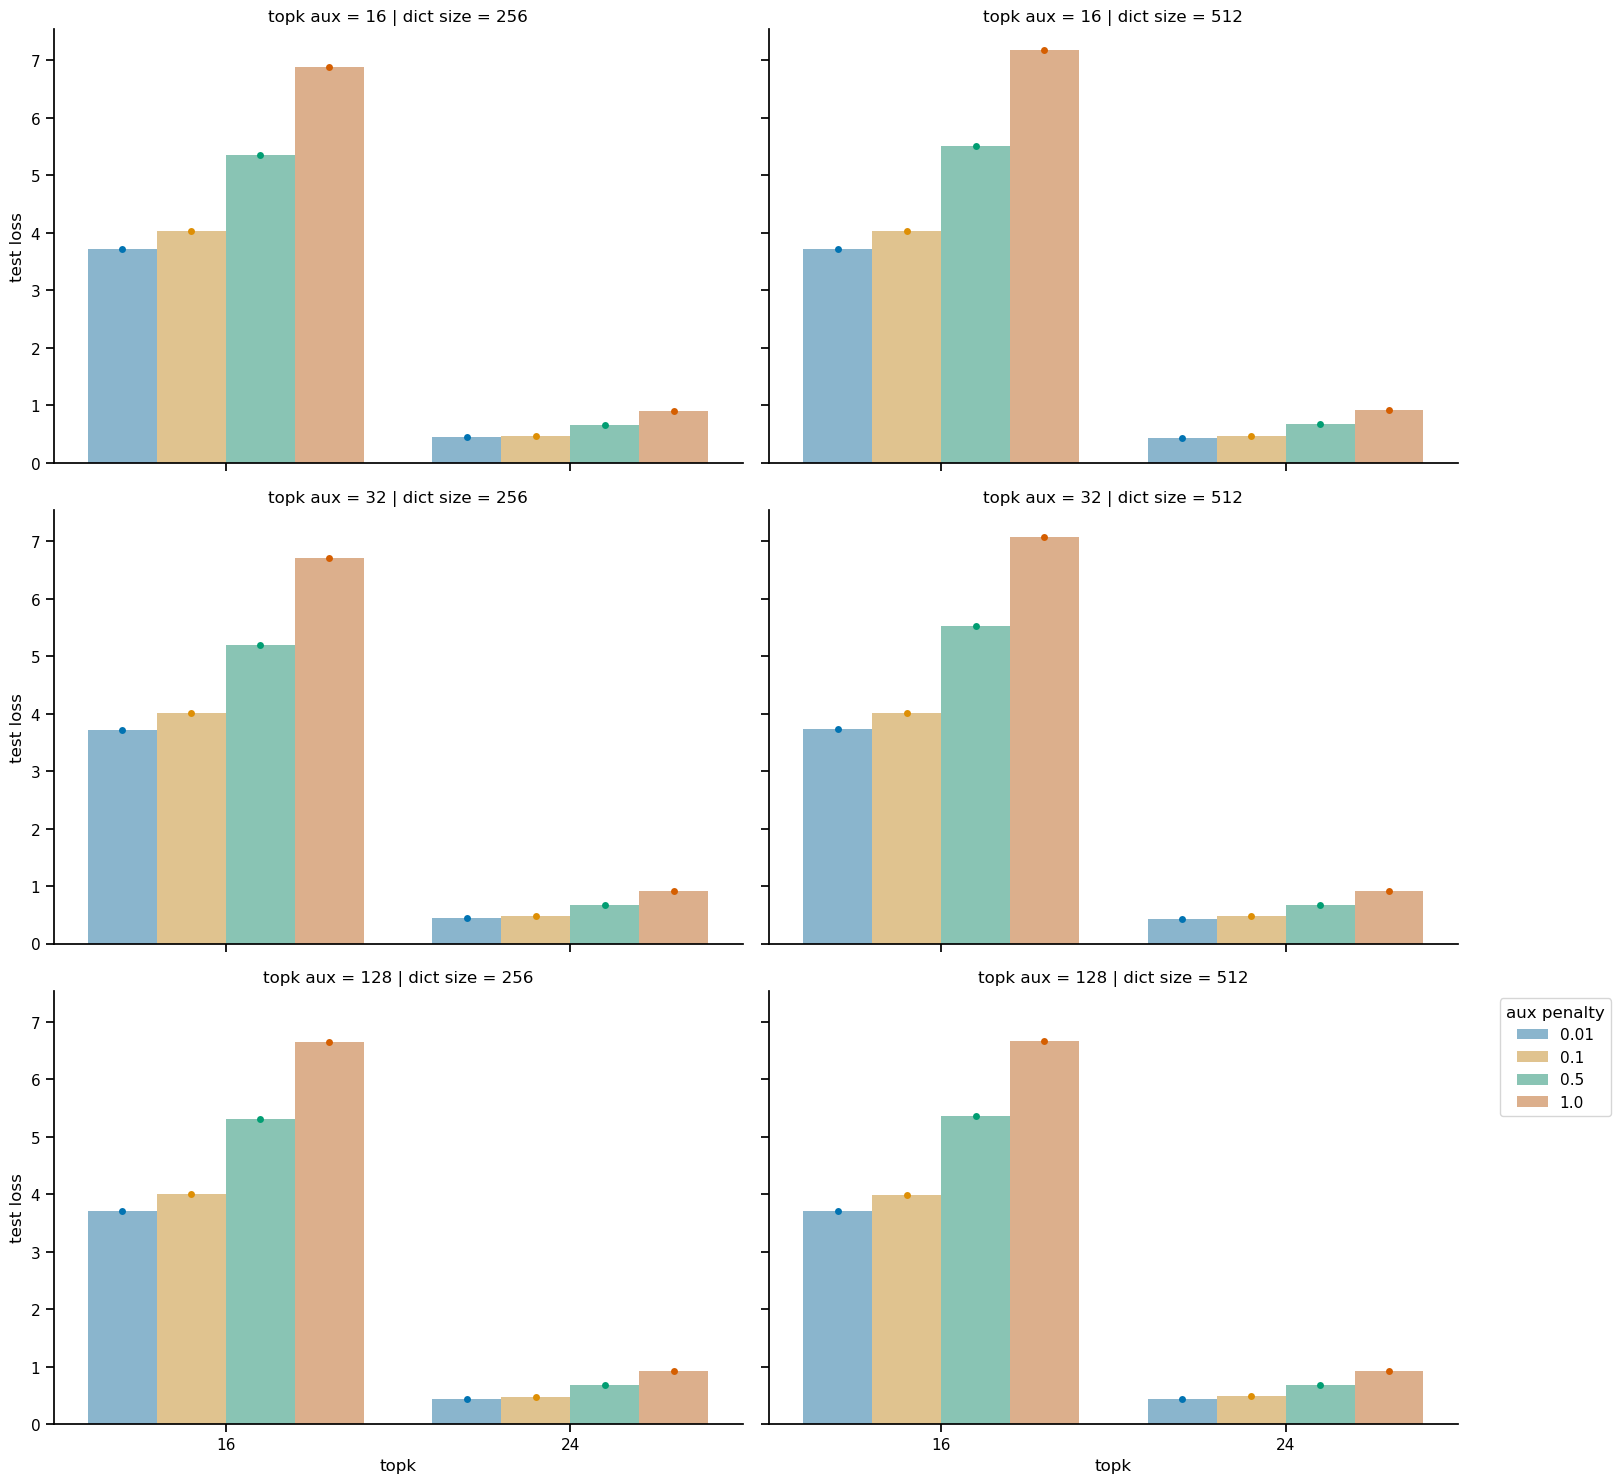

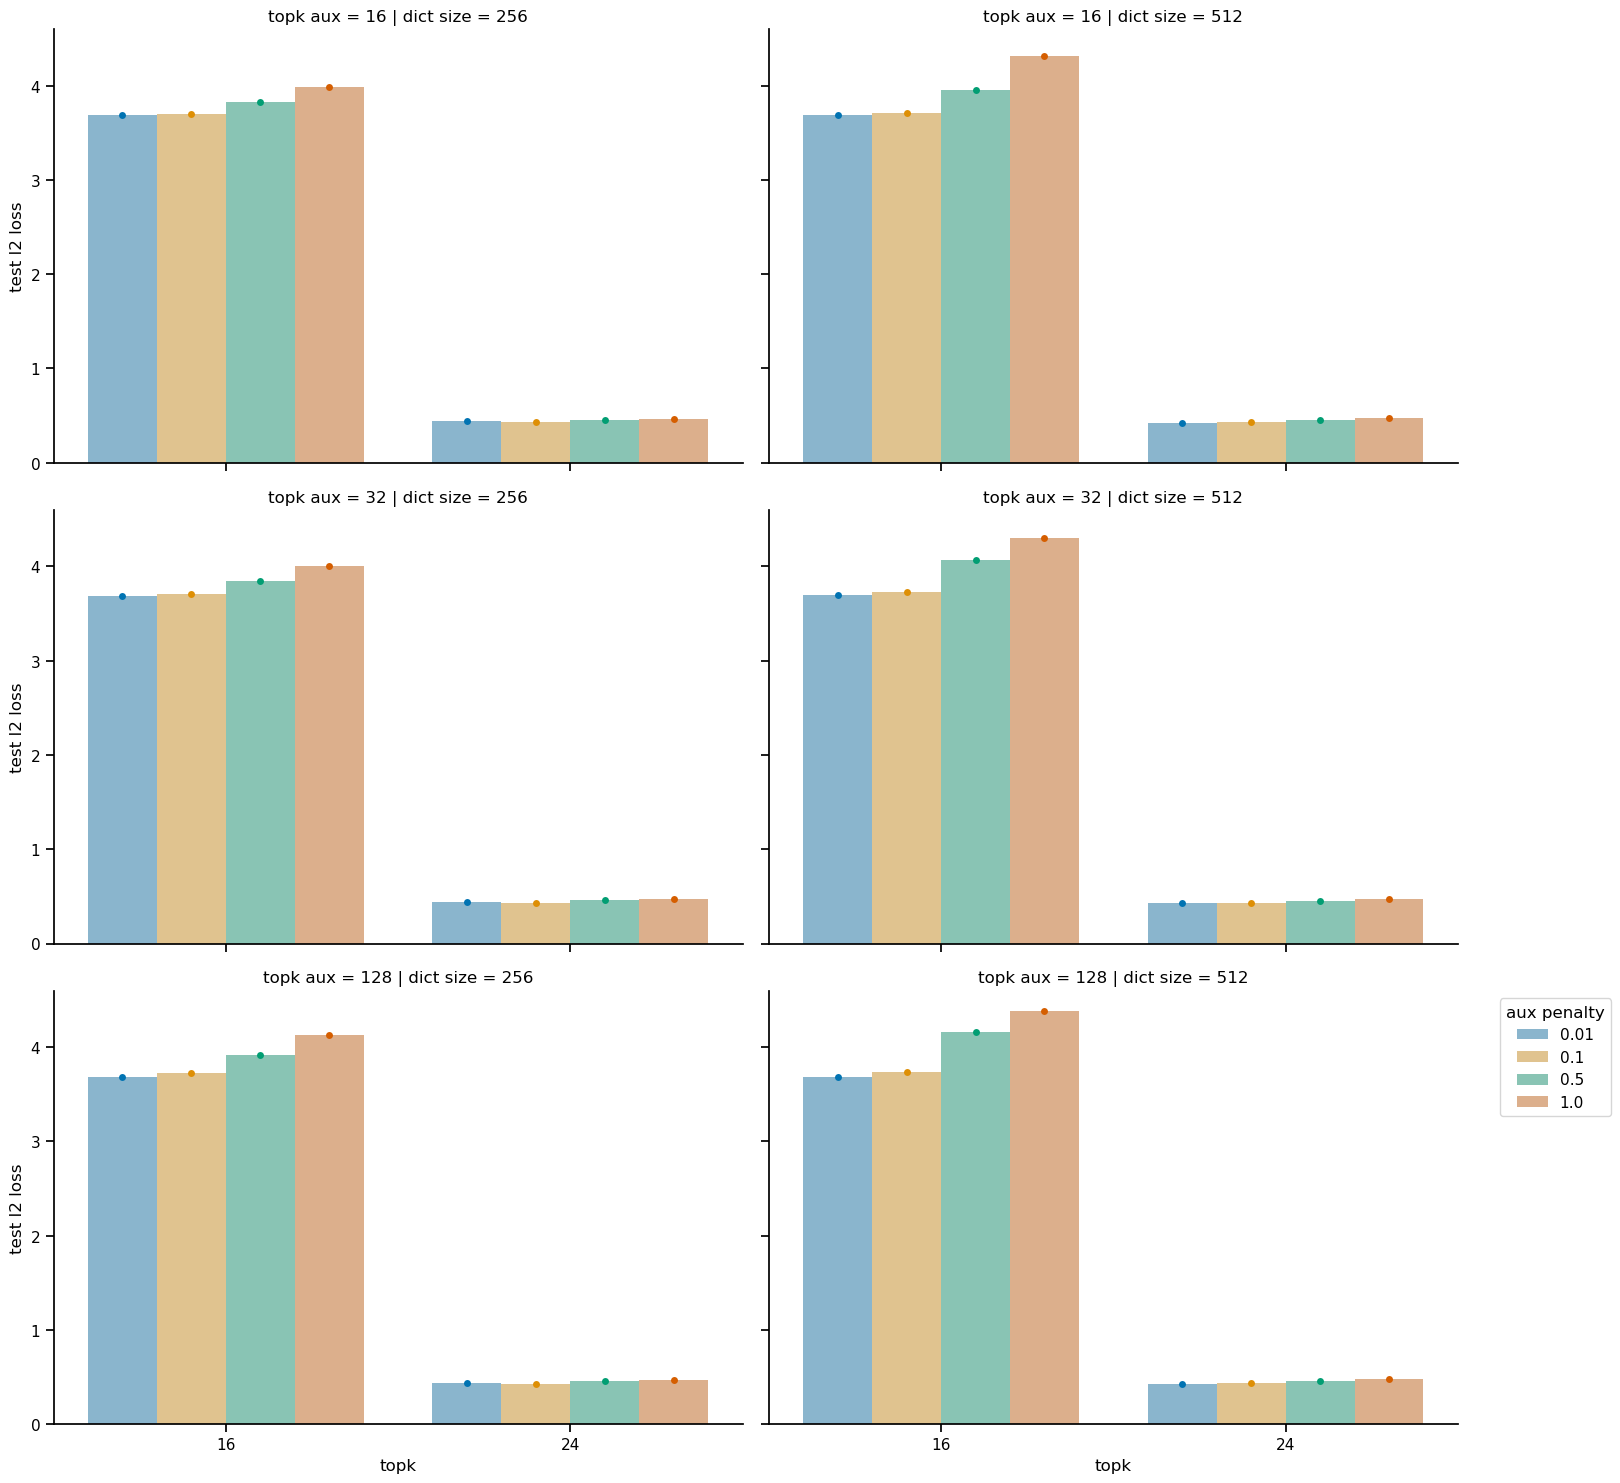

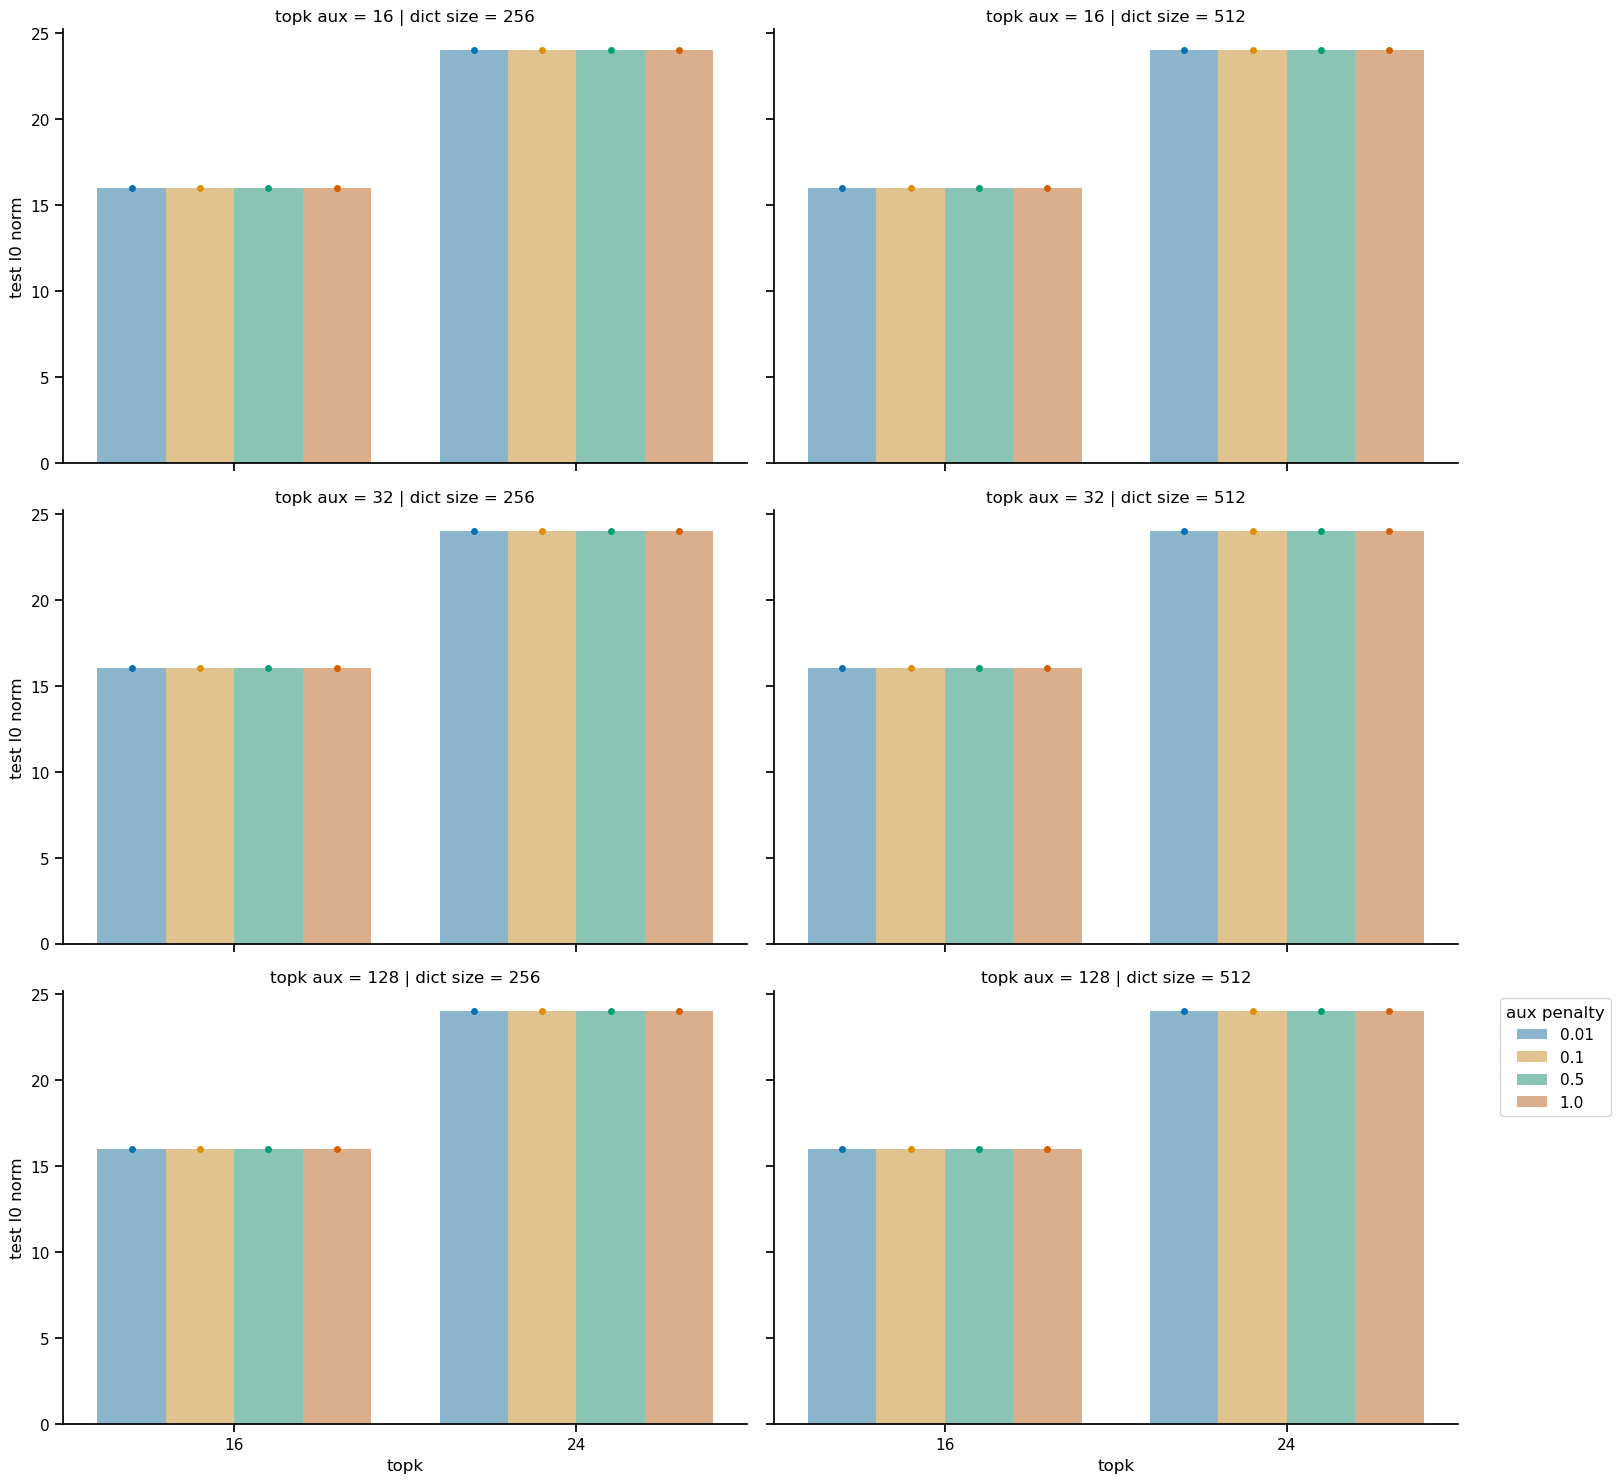

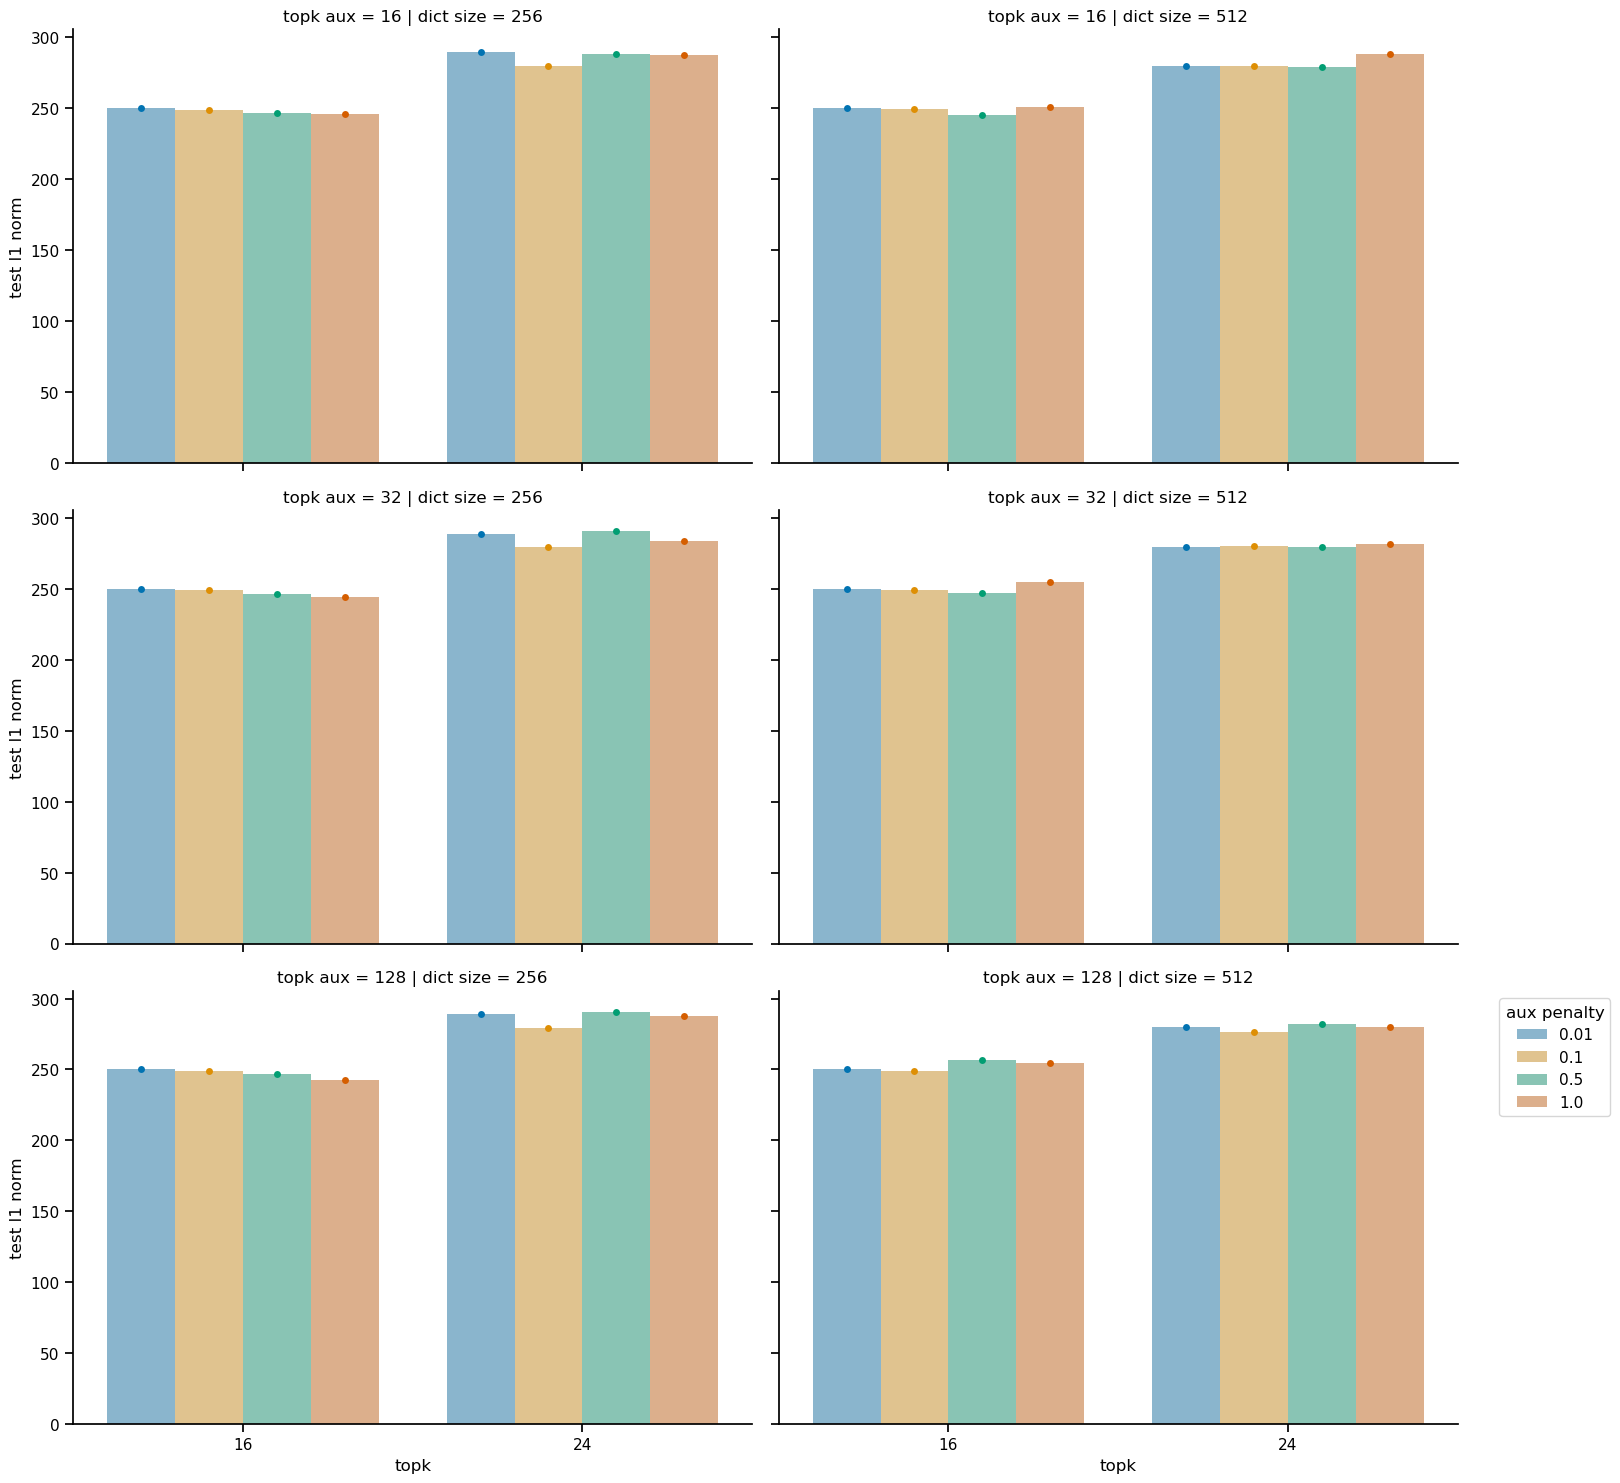

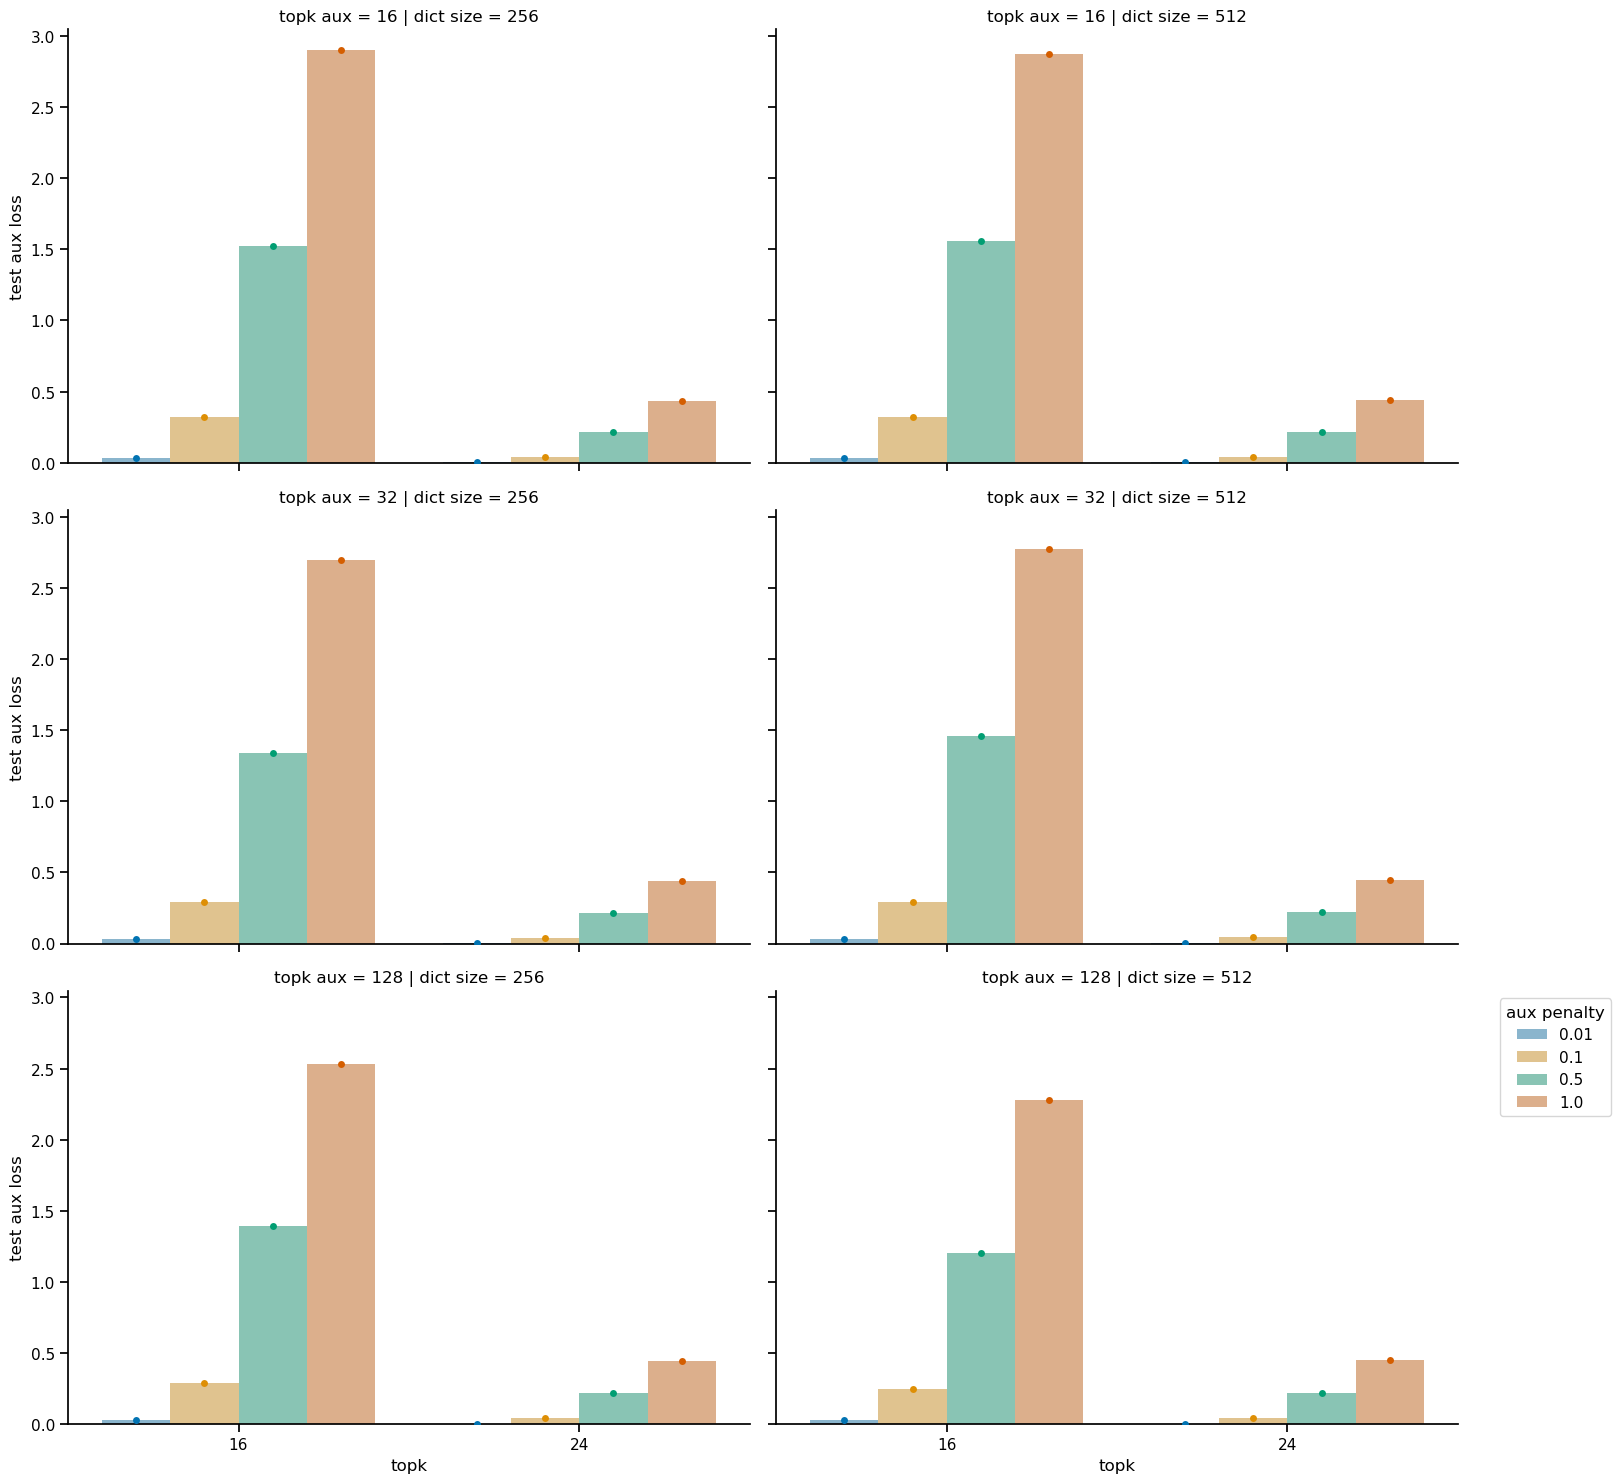

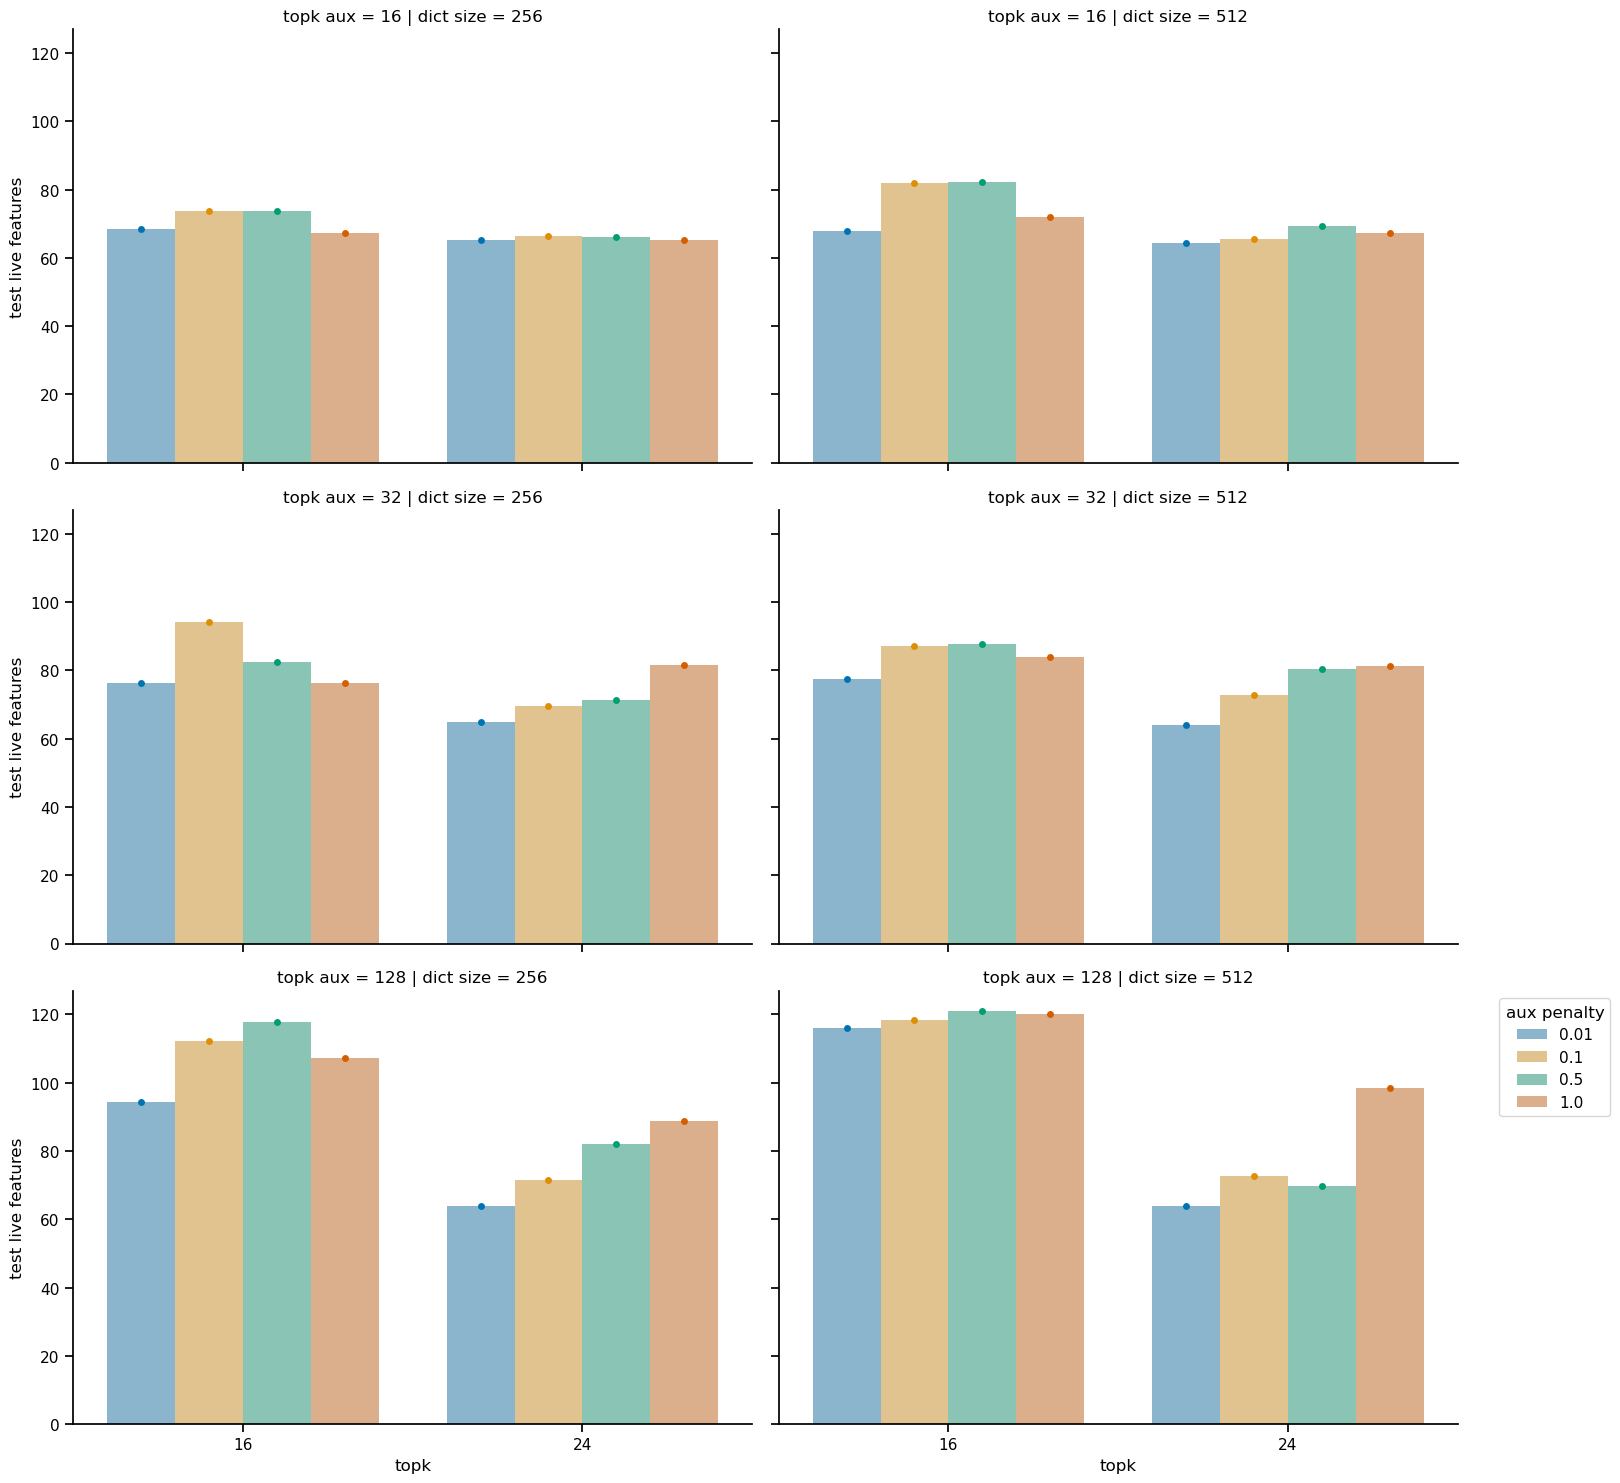

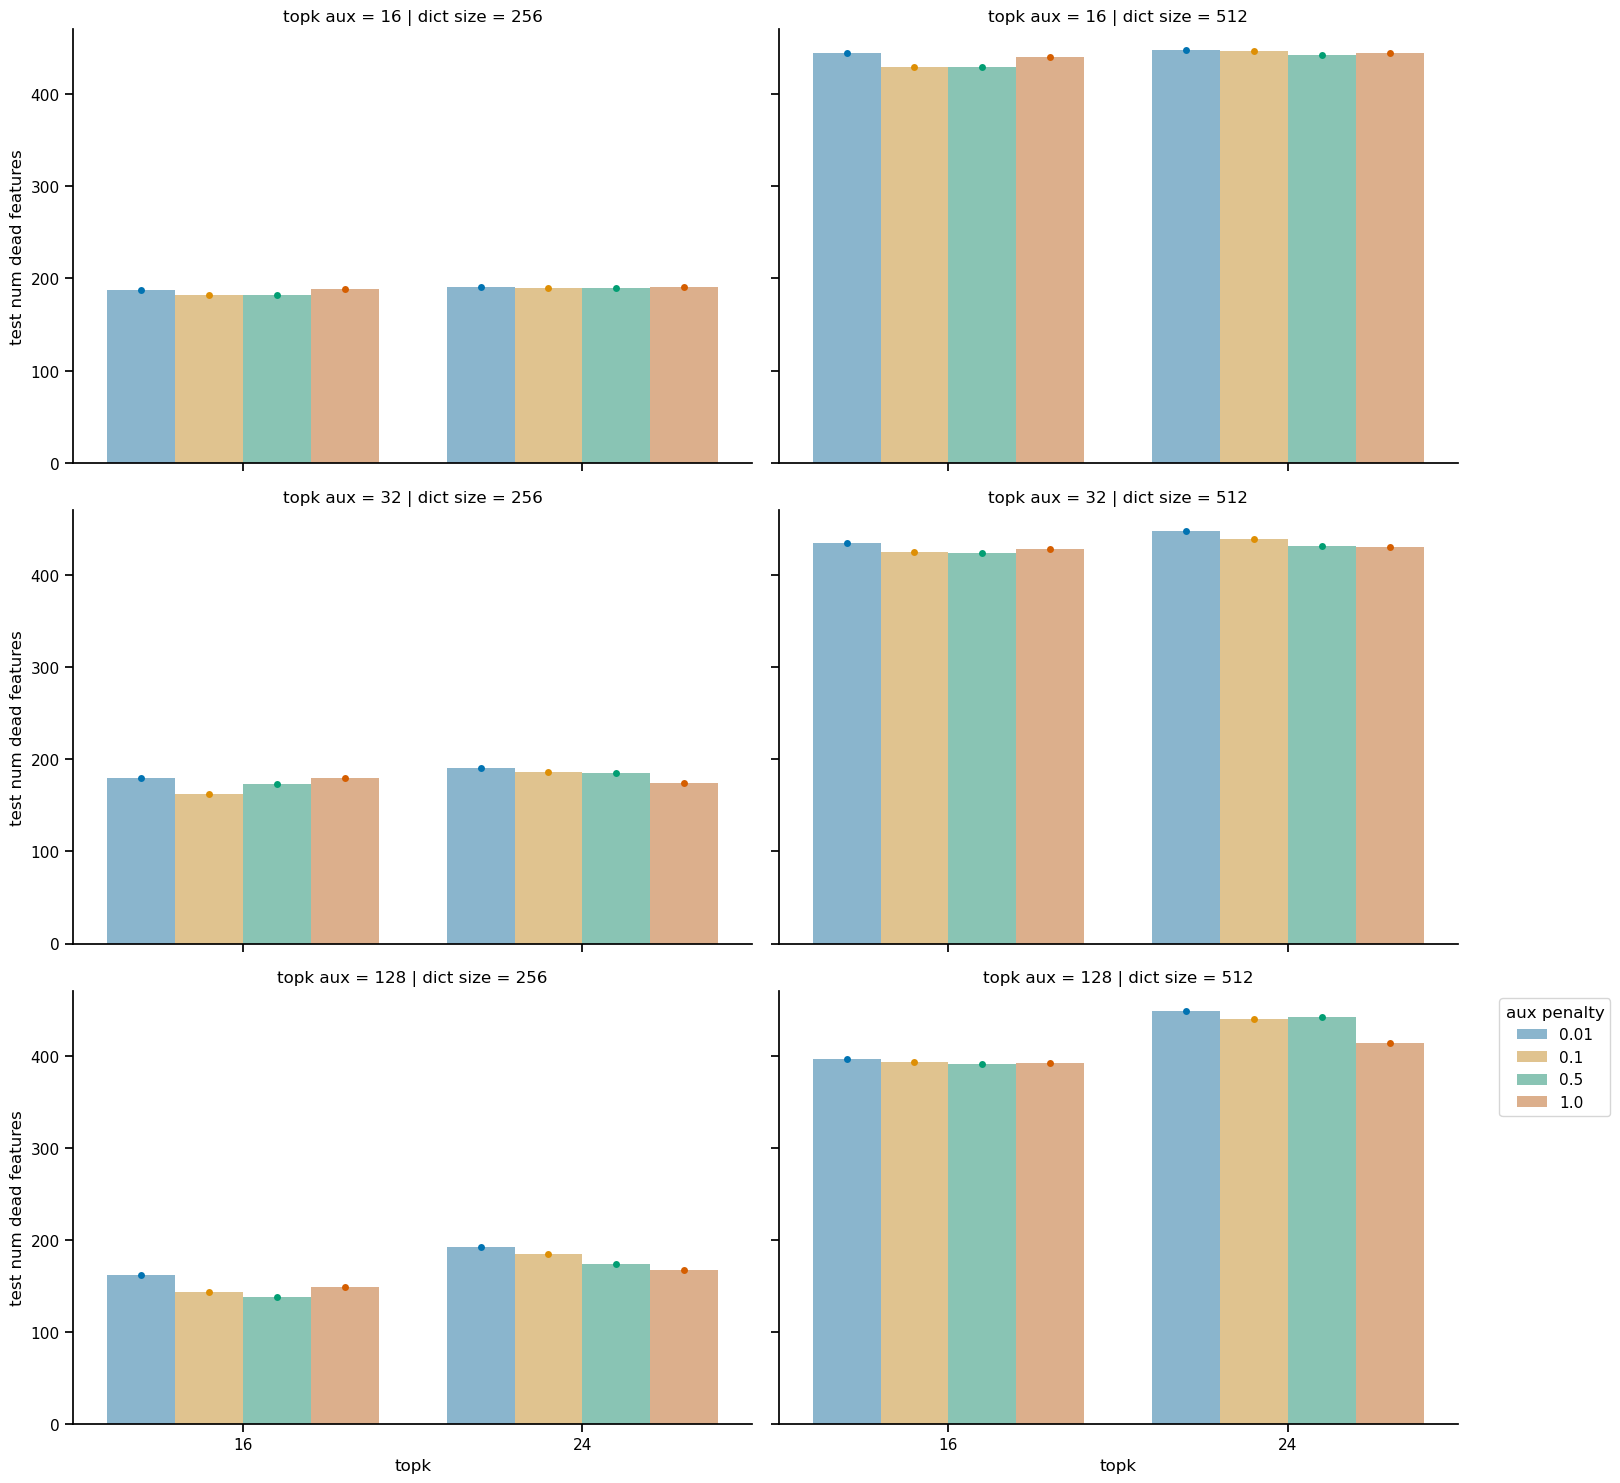

In [13]:
test_cols = ['test loss', 'test l2 loss', 'test l0 norm', 'test l1 norm', 'test aux loss','test live features','test num dead features']

test_plot['aux penalty'] = test_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=test_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


,const,dict size,topk,topk aux,aux penalty
0,NaN,-0.989529,-0.989529,-0.853629,1.511450
1,NaN,-0.989529,-0.989529,-0.853629,-0.992877
2,NaN,-0.989529,-0.989529,1.387147,1.511450
3,NaN,-0.989529,-0.989529,1.387147,-0.765211
4,NaN,-0.989529,-0.989529,-0.853629,-0.765211
5,NaN,-0.989529,-0.989529,-0.533518,-0.765211
6,NaN,-0.989529,-0.989529,-0.853629,0.246638
7,NaN,-0.989529,-0.989529,-0.533518,-0.992877
8,NaN,-0.989529,-0.989529,1.387147,0.246638
9,NaN,-0.989529,-0.989529,-0.533518,0.246638


In [ ]:
def simple_to_markdown(table):
    # Get column names from first row of table
    columns = [str(col).strip() for col in table[0]]
    
    # Print header row
    print("| " + " | ".join(columns) + " |")
    
    # Print separator row
    print("| " + " | ".join([''.join(["-"]*len(c)) for c in columns]) + " |")
    
    # Print data rows, starting from second row
    for row in table[1:]:
        values = []
        for val in row:
            # Try to format as scientific notation if numeric
            try:
                val_float = float(val)
                values.append(f'{val_float:.2e}')
            except:
                values.append(str(val).strip())
        print("| " + " | ".join(values) + " |")

In [69]:
import statsmodels.api as sm

# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test l2 loss'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()


display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           test l2 loss   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2605.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.12e-50
Time:                        11:23:51   Log-Likelihood:                 37.518
No. Observations:                  48   AIC:                            -65.04
Df Residuals:                      43   BIC:                            -55.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1680      0.017    128.380      0.000       2.134       2.202
dict size       0.0318      0.017      1.866      0.069      -0.003       0.066
topk           -1.7382      0.017   -101.849      0.000      -1.773      -1.704
topk aux        0.0153      0.017      0.899      0.374      -0.019       0.050
aux penalty     0.1097      0.017      6.428      0.000       0.075       0.144
==============================================================================
Omnibus:                        2.599   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.465
Skew:                           0.524   Prob(JB):                        0.292
Kurtosis:                       2.637   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| Dep. Variable: | test l2 loss | R-squared: | 0.996 |
| -------------- | ------------ | ---------- | ----- |
| Model: | OLS | Adj. R-squared: | 0.996 |
| Method: | Least Squares | F-statistic: | 2605. |
| Date: | Wed, 16 Apr 2025 | Prob (F-statistic): | 1.12e-50 |
| Time: | 11:23:51 | Log-Likelihood: | 37.518 |
| No. Observations: | 48 | AIC: | -65.04 |
| Df Residuals: | 43 | BIC: | -55.68 |
| Df Model: | 4 |  |  |
| Covariance Type: | nonrobust |  |  |
None
|  | coef | std err | t | P>|t| | [0.025 | 0.975] |
|  | ---- | ------- | - | ----- | ------ | ------ |
| const | 2.1680 | 0.017 | 128.380 | 0.000 | 2.134 | 2.202 |
| dict size | 0.0318 | 0.017 | 1.866 | 0.069 | -0.003 | 0.066 |
| topk | -1.7382 | 0.017 | -101.849 | 0.000 | -1.773 | -1.704 |
| topk aux | 0.0153 | 0.017 | 0.899 | 0.374 | -0.019 | 0.050 |
| aux penalty | 0.1097 | 0.017 | 6.428 | 0.000 | 0.075 | 0.144 |
None
| Omnibus: | 2.599 | Durbin-Watson: | 1.981 |
| -------- | ----- | -------------- | ----- |
| Prob(Omnibus): |

In [70]:
import statsmodels.api as sm
# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test live features'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     test live features   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.55e-10
Time:                        11:27:24   Log-Likelihood:                -176.28
No. Observations:                  48   AIC:                             362.6
Df Residuals:                      43   BIC:                             371.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.9610      1.452     55.755      0.000      78.033      83.889
dict size       1.7984      1.467      1.226      0.227      -1.161       4.758
topk           -9.1075      1.467     -6.206      0.000     -12.067      -6.148
topk aux       10.3263      1.467      7.037      0.000       7.367      13.286
aux penalty     2.9451      1.467      2.007      0.051      -0.014       5.904
==============================================================================
Omnibus:                        2.306   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.001
Skew:                          -0.383   Prob(JB):                        0.368
Kurtosis:                       2.356   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| Dep. Variable: | test live features | R-squared: | 0.685 |
| -------------- | ------------------ | ---------- | ----- |
| Model: | OLS | Adj. R-squared: | 0.656 |
| Method: | Least Squares | F-statistic: | 23.39 |
| Date: | Wed, 16 Apr 2025 | Prob (F-statistic): | 2.55e-10 |
| Time: | 11:27:24 | Log-Likelihood: | -176.28 |
| No. Observations: | 48 | AIC: | 362.6 |
| Df Residuals: | 43 | BIC: | 371.9 |
| Df Model: | 4 |  |  |
| Covariance Type: | nonrobust |  |  |
None
|  | coef | std err | t | P>|t| | [0.025 | 0.975] |
|  | ---- | ------- | - | ----- | ------ | ------ |
| const | 80.9610 | 1.452 | 55.755 | 0.000 | 78.033 | 83.889 |
| dict size | 1.7984 | 1.467 | 1.226 | 0.227 | -1.161 | 4.758 |
| topk | -9.1075 | 1.467 | -6.206 | 0.000 | -12.067 | -6.148 |
| topk aux | 10.3263 | 1.467 | 7.037 | 0.000 | 7.367 | 13.286 |
| aux penalty | 2.9451 | 1.467 | 2.007 | 0.051 | -0.014 | 5.904 |
None
| Omnibus: | 2.306 | Durbin-Watson: | 1.212 |
| -------- | ----- | -------------- | ----- |
| Pr

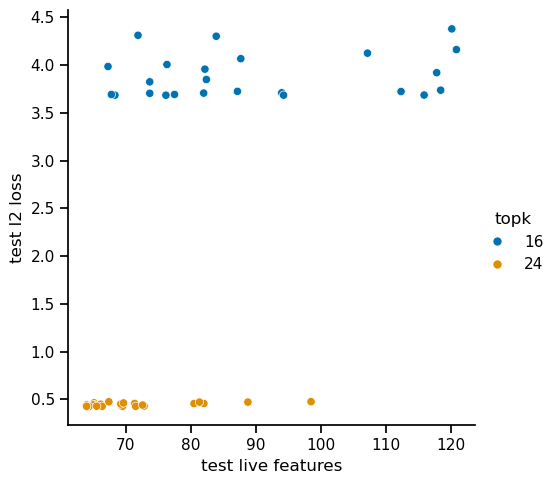

In [22]:
hue_order = [16, 24]
palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                # hue='aux penalty',
                hue='topk',
                hue_order=hue_order,
                palette=palette,
                # col='dict size',
                #     row='topk aux',
                    )



In [24]:
test_plot['test live features'].min()

64.0

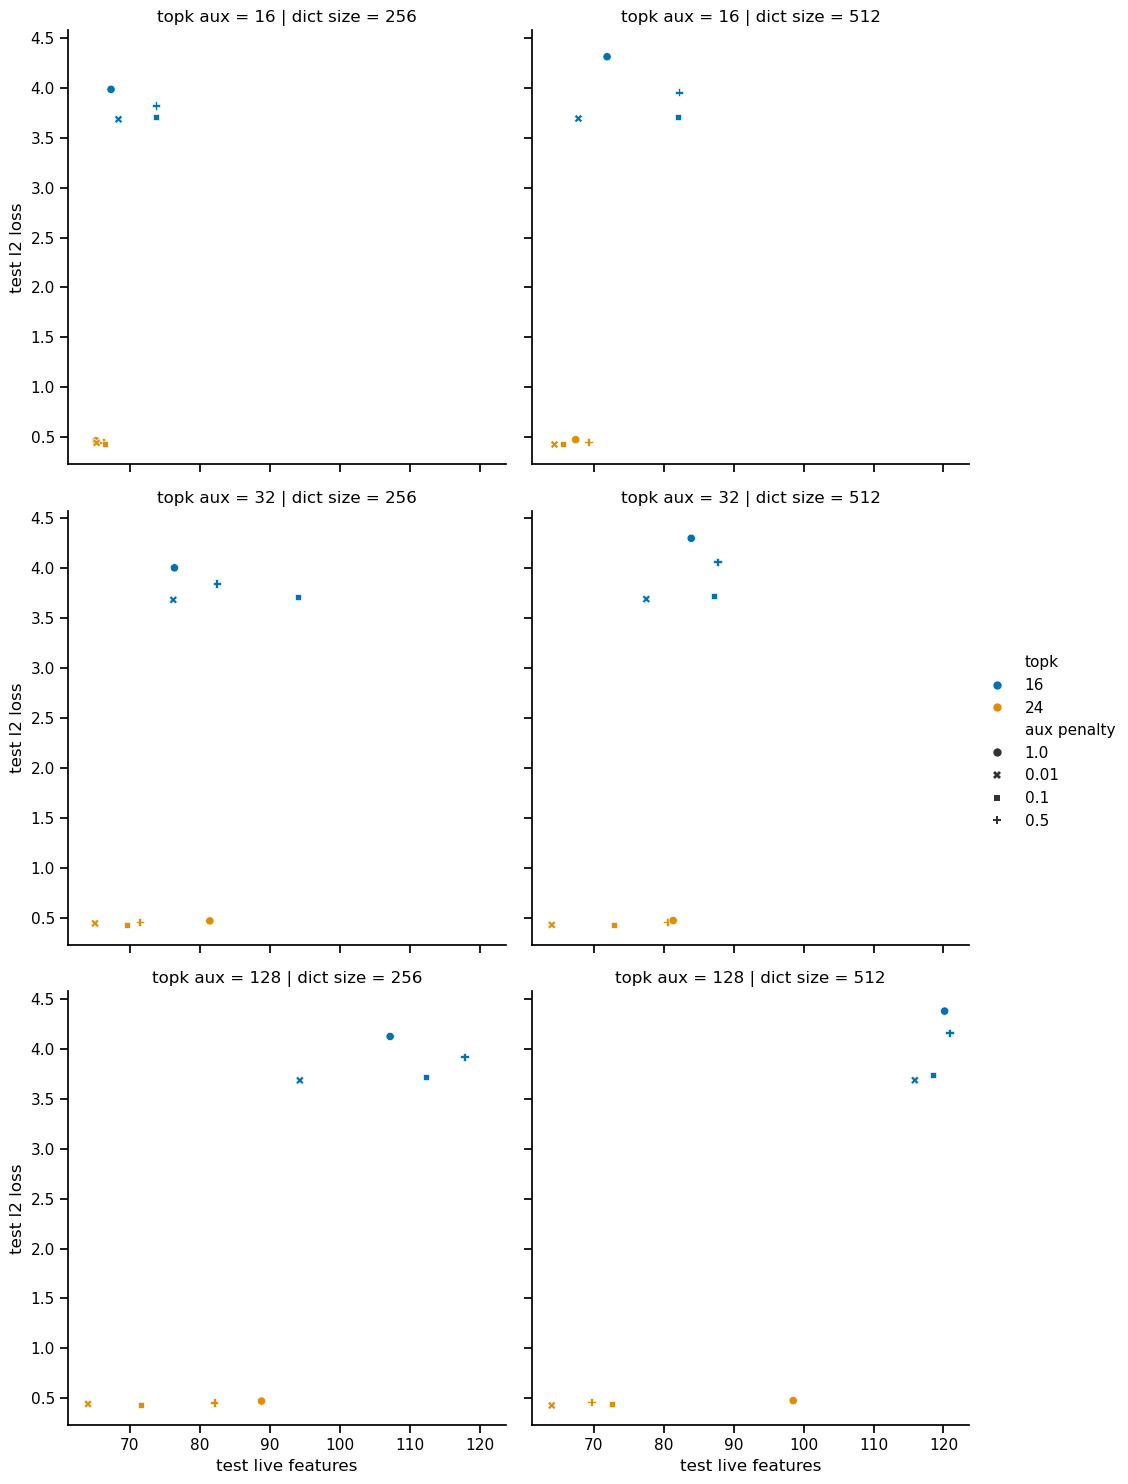

In [23]:
hue_order = [16, 24]
palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                style='aux penalty',
                hue='topk',
                hue_order=hue_order,
                palette=palette,
                col='dict size',
                    row='topk aux',
                    )
